# Hyperspectral in Deep Learning

In this exercise, I explore the use of 3D CNN deep learning models for hyperspectral imagery (HSI). I implement the HybridSN model that includes both 2D and 3D convolutional layers (Roy et al. 2020, see reference below). I will make use of a publicly available hyperspectral test data.

## Hyperspectral data intro

Hyperspectral imageries are characterized by a large number of spectral bands (typically over 100 compared to 3 for RGB) that allow a full view of spectral signatures for ground features. It is used for geological surveys, water quality assessment, land cover or species mapping. One of the challenge of using hyperspectral imagery is the great number of bands that often are highly correlated or redundant. In the context of ML and deep learning, we typical require using:

- dimension reduction
- 3D CNN to leverage the spectral dimension.

We will be expanding on these topics below. In the past more hyperspectrral data was collected airborne with the exception of Hyperion sensor (running from satellite but at 30 m resolution). Many companies are working on collecting hyperspectral imagery using constellation (i.e. Planet, Pixxel etc.) so we should see the availability of such data to increase greatly.

## Spectral curves and dimension reduction

Typical hyperspectral datasets contains hundreds of spectral bands typically in the ranges of 400 nm through 1000nm or 400 nm through 2500nm. The bands'width varies but can range from 10nm through 20 nm per band. When the response in each band in a pixel is plotted on a graph is is often call 'spectral curve. With this large number of bands, there is a wealth of potential information to distinguish more fine details between different land cover surfaces/types. Unfortanely, it is not easy to leverage this information because of the high dimensionality and the high correlation and redundance in the data collected. To leverage the information, two strategy are often used:

- Match spectral curves using all the bands
The spectral curves collected are compared to referance signature libraries of different material/land cover or objects. Various algorithms are used to assign the spectral curves to the different classes. The a strategy is commonly used in spectrometry when spectral curves are gathered using hand held spectrometer. One challenge in the case of Remote Sensing is that the spectral curves may be affected by atmospheric effects and various factors. It is important to correct of these effects.

- Reduce the dimentionnaly. It is more common in the case of remote sensed hyperspectral sensors to reduce the data dimension using PCA/EOF and selecting the components with the most important variance. This is the approach, I take in this example.

## Leveraging 3D CNN for classification

Convuolutional 2D layers leverage the spatial information within an image (height and width). Even after dimension reduction, hyperpsctral imagery has many more channels/bands compared to RGB images and we can still leverage more information using 3D CNN networks. This type of network contains 3D kernels in convolutional layers to capture patterns in the spatial and spectral dimensions.

## Dataset

In this exercise, we use the Indian Pines dataset. It is a public dataset published in 1992 using the AVIRIS hyperspectral air borne sensor. The AVIRIS sensor was flown by NASA over many years to experiment with the use of hyperspectral sensors.


Based on work of : S. K. Roy, G. Krishna, S. R. Dubey, B. B. Chaudhuri HybridSN: Exploring 3-D–2-D CNN Feature Hierarchy for Hyperspectral Image Classification, IEEE GRSL 2020
available here: https://arxiv.org/pdf/1902.06701.pdf

## Interesting links:

- raster in python:

https://geobgu.xyz/py/rasterio2.html

- https://purr.purdue.edu/publications/1947/1

- https://shivendra-b180717ee.medium.com/hyperspectral-image-classification-using-3d-convolutional-neural-network-f0a257322666

- https://colab.research.google.com/github/antongardi/abraia-multiple/blob/main/notebooks/DeepHSIClassification.ipynb#scrollTo=tAxf4dEgakM1

- https://github.com/eecn/Hyperspectral-Classification

- https://github.com/nishchaljs/3D-Hyper-UNET

- https://arxiv.org/pdf/1902.06701.pdf

- https://towardsdatascience.com/land-cover-classification-of-satellite-imagery-using-convolutional-neural-networks-91b5bb7fe808

- hyperspectral benchmark datasets available:

https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes


# Set up environment and load libraries

- load libraries
- install packages and tools
- authenticate to google drive and gcp account

In [1]:
#set up libararies for GIS/Geospatial
try: # try the following block of code
  import geopandas as gpd
except: # if the try block throws an error, run the following
  !pip install geopandas # install geopandas
  import geopandas as gpd

try:
  import contextily as ctx # import
  import rasterio
except:
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  !pip install rasterio
  #!pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
#import contextily as ctx # library for providing background maps
import fiona # library for reading/writing GIS files, comes w/ geopandas
from shapely.geometry import Point, LineString, Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 97.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (7.2.1-1~focal0).
libproj-dev set to manually installed.
proj-data is already the newest version (7.2.1-1~focal0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 46 not upgraded.
Need to get 170 kB of archives.
After this operation, 485 kB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal/main amd64 proj-bin amd64 7.2.1-1~focal0 [170 kB]
Fetched 170 kB in 1s (251 kB/s)
Selecting p

In [2]:
!pip install rasterio
!pip install pyproj
!apt install unzip

#https://colab.research.google.com/github/bwsi-hadr/03-Intro-to-GIS/blob/master/03_Intro_to_GIS.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [3]:

###### Library used in this script
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import colors
import matplotlib.patches as mpatches
import seaborn as sns

import numpy as np
import subprocess
import pandas as pd
import os, glob
import zipfile

# Mapping,vector related imports
import geopandas as gpd
#import descartes #nessary for plotting in geopandas
from cartopy import crs as ccrs
from pyproj import Proj
#from osgeo import osr
from shapely.geometry import Point
from shapely.geometry import box
from collections import OrderedDict

#ML imports
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#rasterio imports, gdal and imagery utility
import rasterio
from rasterio.windows import Window
from osgeo import gdal
from rasterio import plot
from PIL import Image

#Keras import
from tensorflow import keras
#from keras.models import Model
import tensorflow

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Concatenate, Activation, MaxPool2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import models
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

from keras.utils import np_utils
sns.set_style('darkgrid')
pd.set_option('display.max_colwidth', None)

In [4]:
#GCP account authentification
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Functions
In the next part of the script, we declare all the functions used in the sripts.  It is good practice to place functions at the beginning of a script or in an external source file. Here are the 13 functions used:

* **create_dir_and_check_existence**:  create and output directory given a path. The output directory will be the working directory throughout the analysis.

* **generate_files_data_df**: generate a list of image files with path and type.

* **create_image_window**; extract image windows/patchs/chips from a raster image. The output is list of image chips corresponding to the input image. The chips/window to run or fit the deep learning model.

* **create_image_window_generator**:generate batch of data to use in the deep learning model. The dataset being to large, an image chip is provided one at a time when fiting the deep learning model.

* **extract_center_windows**: extract center pixel from image windows/patchs/chips.

* **padding_image**: pad raster image given input dimension.

* **adjust_dimensions**: expand dimensions for raster images.

* **predict_raster**: predict raster image given the 3D hyprid SN mode by running it at each pixel location.

* **freq_array**: report of frequency of values for a given raster.

* **plot_roc**: generate ROC plots using a reference and a predicted image. AUC
values are also returned for testing and training if provided.

* **generate_iou_dice_metrics**: geneate IOU (aka Jaccard index) and dice metrics to evaluate the classification.

* **binary_crosstab_array**: generate error map for boolean (0,1) reference and predicted raster (input format as np.array).

* **generate_accuracy**: generate precision and recal metrics given inputs.



In [6]:
def create_dir_and_check_existence(path):

    #Create a new directory
    try:
        os.makedirs(path)
    except:
        print ("directory already exists")

from matplotlib import pyplot

In [7]:
def generate_files_data_df(in_path):
    """
    Generate data frame for the input raster files.

    Input Arguments:

    in_path: parent directory path to the data files

    Return Outputs:

    files_df: pandas data frame containing directory path to training, testing and validation images.

    """

    fileglob = "*.tif*"
    path_raster_sat = os.path.join(in_path+'/**/sat/',fileglob) #raw raster
    fileglob = "*.tif*"
    path_raster_map = os.path.join(in_path+'/**/map/',fileglob) #classified

    files_raster_sat = glob.glob(path_raster_sat,recursive=True)
    files_raster_map = glob.glob(path_raster_map,recursive=True)

    files_map_df = pd.DataFrame({'files_map':files_raster_map})
    files_sat_df = pd.DataFrame({'files_sat':files_raster_sat})

    #files_sat_df['scene_id_sat'] = files_sat_df['files_sat'].apply(lambda x: os.path.basename(x).replace('.tiff',""))
    files_sat_df['scene_id_sat'] = files_sat_df['files_sat'].apply(lambda x: os.path.basename(x).replace('.tif',""))

    files_map_df['scene_id_map'] = files_map_df['files_map'].apply(lambda x: os.path.basename(x).replace('_gr.tif',""))

    files_df = (files_sat_df.merge(files_map_df,
                                  left_on='scene_id_sat',
                                  right_on='scene_id_map',
                                  how='inner')
                             .drop(columns=['scene_id_map'])
                             .rename(columns={'scene_id_sat':'scene_id'})
               )
    files_df['type']= files_df['files_sat'].apply(lambda x: os.path.basename(os.path.dirname(os.path.dirname(x)))) #make it more elegant later

    return files_df


In [8]:
def plot_roc(y_test,
             y_scores_test,
             y_scores_train=None,
             y_train=None,
             model_name=None,
             show_fig=True,
             out_file=None):
    '''
    This functions gnerate an ROC plot curve and AUC metric.

    Input Arguments:

    y_test: input one dimension array containing test label/target
    y_scores_test: input one dimension array containing predicted test scores (between 0 and 1)
    y_scores_train: input one dimension array containing predicted train scores (between 0 and 1),
                    default is None
    y_train:input one dimension array containing train scores (between 0 and 1),
            default is None.
    model_name: string containing model name (e.g. UNET), default is None
    show_fig:if True, ROC plot is shown.
    out_file: name of output file for ROC plot
              if None, a default name is set.

    Return Outputs:

    roc_df: DataFrame with three columns: threshold, False Positive Rate (fpr) and True Positive Rate (tpr)
    auc_df: DataFrame with three columns: test AUC ('test', train AUC ('train'),model name ('model')

    '''

    if model_name is None:
        model_name = 'model'
    # Now check the number of 1 and 0
    unique, counts = np.unique(y_test, return_counts=True)
    if len(unique) > 1:
      auc_val_test =roc_auc_score(y_test,y_scores_test)
    else:
      auc_val_test = np.nan

    if y_scores_train is None:
        auc_val_train = np.nan
    elif y_train is None:
        auc_val_train = np.nan
    else:
        auc_val_train = roc_auc_score(y_train,
                                      y_scores_train)

    if len(unique) > 1:
      print("AUC train: ", auc_val_train)
      print("AUC test: ", auc_val_test)

      #Generate inputs for ROC curves
      fpr, tpr, thresholds = roc_curve(y_test,
                                     y_scores_test)
      plt.figure()
      label_val = '%s (area= %0.2f)' % (model_name,auc_val_test)

      plt.plot(fpr, tpr,
             label=label_val)

      plt.plot([0, 1], [0, 1],'r--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Test ROC')
      plt.legend(loc="lower right")
    else:
      thresholds = [np.nan]
      tpr= [np.nan]
      fpr = [np.nan]

    if out_file is None:
       out_file = model_name + '_roc_curve.png'

    plt.savefig(out_file)

    if show_fig == True:
        plt.show()
    else:
        plt.close()

    roc_df = pd.DataFrame({'thresholds': thresholds,
                           'tpr': tpr,
                           'fpr': fpr})

    auc_df = pd.DataFrame(np.array([[auc_val_test],[auc_val_train],[model_name]]).reshape(1,3),
                         columns=['test','train','model'])

    return roc_df, auc_df

In [9]:
#Original code from coursera for iou and dice scores,
#Modified by Benoit to fix some issues, especially nan related and expanded functionality
def gnerate_iou_dice_metrics(y_true, y_pred,n_classes=2):
  '''
  Compute IOU and dice scores based on input.

  Args:
    y_true: ground truth label
    y_pred (tensor) - predicton
    n_classes: number of classes
  '''

  class_iou = []
  class_dice_score = []

  unique, counts = np.unique(y_true, return_counts=True)
  if len(unique) > 1:
    smoothening_factor = 0.00001 #avoid if there is a class with zero frequency
    #np.unique(y_true)
    for i in np.arange(0,n_classes):
      intersection = np.sum((y_pred == i) * (y_true == i))
      y_true_area = np.sum((y_true == i))
      y_pred_area = np.sum((y_pred == i))
      combined_area = y_true_area + y_pred_area

      iou = (intersection + smoothening_factor) / (combined_area - intersection + smoothening_factor)
      class_iou.append(iou)

      dice_score =  2 * ((intersection + smoothening_factor) / (combined_area + smoothening_factor))
      class_dice_score.append(dice_score)
  else:
    for i in np.arange(0,n_classes):
      iou=np.nan
      dice_score=np.nan
      class_dice_score.append(dice_score)
      class_iou.append(iou)

  df_scores = pd.DataFrame.from_dict({
      'class':np.arange(0,n_classes),
      'iou':class_iou,
      'dice':class_dice_score
  })

  return df_scores

In [10]:
def binary_crosstab_array(arr1,arr2):

  """
  This function generates a crosstab numpy array given two input arrays.
  The first array 'arr1' can be taken as a reference to which the
  second array (arr2) is compared. One can think of arr2 as the prediction.
  Note that the arrays are assumed to be boolean with values 0 or 1.
  The output is a new array with four values 0,1,2,3 corresponding respectively
  to True Negative (TN), True Positive (TP), False Positive (FP) and False Negative (FN).

  TO DO:   Add later testing for number of rows and cols matching to avoid error

  Input Arguments:
  arr1: reference array (numpy type)
  arr2: predicted array (numpy type)

  Return Outputs:
  arr_new: reclassified output array with confusion matrix including TP, TN,FP, FN
  df_label_new: data frame with values and corresponding labels used in arr_new

  """

  row,col = arr1.shape #get height/row and width/col

  arr_new = np.empty(arr1.shape, dtype=int) #new output array with values reclassified as TN,TP,FP,FN

  for i in range(0,row):
    for j in range(0,col):
      if (arr1[i,j]==arr2[i,j]) and (arr1[i,j]==0) :
        arr_new[i,j]=0 #True Negative (TN)
      if (arr1[i,j]==arr2[i,j]) and (arr1[i,j]==1) :
        arr_new[i,j]=1 #True Positive (TP)
      if (arr1[i,j]!=arr2[i,j]) and (arr1[i,j]==0) :
        arr_new[i,j]=2 # False Positive (FP)
      if (arr1[i,j]!=arr2[i,j]) and (arr1[i,j]==1) :
        arr_new[i,j]=3 # False Negative (FN)

  df_label_new = pd.DataFrame({"val": [0,1,2,3],
                                "label":["TN","TP","FP","FN"]
                              })
  return arr_new, df_label_new


In [11]:
def extract_center_windows(w_image,image_size):
  mid_window =int((image_size - 1) / 2)
  n_channel = w_image.shape[2]
  center_w = w_image[:,image_size-mid_window,image_size-mid_window,:]
  return center_w

In [12]:
def padding_image(rast, padding_val=2):
    #adding zero on both sides for height and width
    rast_new = np.zeros((rast.shape[0] + 2 * padding_val, rast.shape[1] + 2* padding_val, rast.shape[2]))
    h_offset = padding_val #height offset
    w_offset = padding_val #width offset
    #copy the original value in the new raster
    rast_new[h_offset:rast.shape[0] + h_offset, w_offset:rast.shape[1] + w_offset, :] = rast
    return rast_new

In [13]:
def create_image_window_generator(raster_x,
                        raster_y,
                        image_size=25,
                        pad=True):
    '''
    This function generates image subsets called chips given an input file and a series of arguments.

    Input Arguments:

    in_file: input file name, this assumes 3 bands
    image_size: default size (height=width) for the image chip/subset produced.
    row_offset: row/height offset provided, if none this is generated on the fly randomly
    col_offset: col/width offset provided, if none this is generated on the fly randomly
    rescale: not implemented yet, option to rescale the image, default is None
    out_file: not implemented yet, option to save the image chip, default is None
    shape_file: not implemented yet,option to use a shape file to crop the image and generate chip, default is None
    plot: generate plot using RGB bands, default option is False

    Return Outputs:

    w_image: chip/cropped image with size image_size x image_size return as a numpy array with 3 channels/bands
    df_chip: pandas data frame containing meta data including row and column offset
             used in sampling the image chip as well as
             the coordinates of the extent/bounding box of the image chip,
             original file used and the scene id.

    '''

    while True:
      if pad is True:
        padding_val = int((image_size - 1) / 2)
        raster_x = padding_image(raster_x, padding_val)
        mid_window = padding_val
      else:
        mid_window =int((image_size - 1) / 2)

      height_val = raster_x.shape[0]
      width_val = raster_x.shape[1]
      channel_val_x = raster_x.shape[2]

      limit_row = height_val - image_size #the new image chip cannot exceed the limit of the image otherwise it will not have the expected size
      limit_col = width_val - image_size #the new image chip cannot exceed the limit of the image otherwise it will not have the expected size


      for h in range(0, limit_row+1):
          for w in range(0,limit_col+1):
              w_image_x = raster_x[h:h+image_size,w:w+image_size,:]
              w_image_y = raster_y[h:h+image_size,w:w+image_size,:]

      batch_image_x = w_image_x
      batch_image_y = w_image_y

      yield batch_image_x, batch_image_y


In [14]:
def create_image_window(raster_x,
                        raster_y,
                        image_size=25,
                        pad=True):
    '''
    This function generates image subsets called chips given an input file and a series of arguments.

    Input Arguments:

    in_file: input file name, this assumes 3 bands
    image_size: default size (height=width) for the image chip/subset produced.
    row_offset: row/height offset provided, if none this is generated on the fly randomly
    col_offset: col/width offset provided, if none this is generated on the fly randomly
    rescale: not implemented yet, option to rescale the image, default is None
    out_file: not implemented yet, option to save the image chip, default is None
    shape_file: not implemented yet,option to use a shape file to crop the image and generate chip, default is None
    plot: generate plot using RGB bands, default option is False

    Return Outputs:

    w_image: chip/cropped image with size image_size x image_size return as a numpy array with 3 channels/bands
    df_chip: pandas data frame containing meta data including row and column offset
             used in sampling the image chip as well as
             the coordinates of the extent/bounding box of the image chip,
             original file used and the scene id.

    '''


    if pad is True:
      padding_val = int((image_size - 1) / 2)
      raster_x = padding_image(raster_x, padding_val)
      raster_y = padding_image(raster_y,padding_val)
      mid_window = padding_val
    else:
      mid_window =int((image_size - 1) / 2)

    height_val = raster_x.shape[0]
    width_val = raster_x.shape[1]
    channel_val_x = raster_x.shape[2]

    limit_row = height_val - image_size #the new image chip cannot exceed the limit of the image otherwise it will not have the expected size
    limit_col = width_val - image_size #the new image chip cannot exceed the limit of the image otherwise it will not have the expected size

    list_w_image_x = []
    list_w_image_y = []

    for h in range(0, limit_row+1):
        for w in range(0,limit_col+1):
            w_image_x = raster_x[h:h+image_size,w:w+image_size,:]
            w_image_y = raster_y[h:h+image_size,w:w+image_size,:]
            list_w_image_x.append(w_image_x)
            list_w_image_y.append(w_image_y)

    #return only images,
    batch_image_x=np.stack(list_w_image_x)
    batch_image_y=np.stack(list_w_image_y)

    return batch_image_x, batch_image_y

In [15]:
def freq_array(r,band_number=1):
  if isinstance(r,rasterio.io.DatasetReader):
    r = r.read(band_number)
  unique, counts = np.unique(r, return_counts=True)
  unique_val = np.asarray((unique, counts)).T
  unique_val_df = pd.DataFrame(unique_val,columns=['value','count'])
  return unique_val_df


In [16]:
#exand numpy array dimension, add dimension 1 at the start and end for model
def adjust_dimensions(r_array):
  return np.expand_dims(np.expand_dims(r_array, axis=3),axis=0)

In [17]:
def predict_raster(raster_x,
                   model,
                   image_size=25,
                   n_classes=16,
                   pad=True):
    '''
    This function generates image subsets called chips given an input file and a series of arguments.

    Input Arguments:

    raster_x: input raster image as numpy array
    model: tensorflow keras Model to use for prediction at each pixel
    image_size: input image chip/patch used in the model
    n_classes: number of classes predicted
    pad: if True pad image to conserve input image size
    Return Outputs:
    raster_pred: raster image of numpy array


    '''


    if pad is True:
      padding_val = int((image_size - 1) / 2)
      raster_x = padding_image(raster_x, padding_val)
      mid_window = padding_val
    else:
      mid_window =int((image_size - 1) / 2)

    height_val = raster_x.shape[0]
    width_val = raster_x.shape[1]
    channel_val_x = raster_x.shape[2]

    rast_pred =np.empty((height_val-2*padding_val,width_val-2*padding_val,n_classes), dtype=float, order='C')

    limit_row = height_val - image_size #the new image chip cannot exceed the limit of the image otherwise it will not have the expected size
    limit_col = width_val - image_size #the new image chip cannot exceed the limit of the image otherwise it will not have the expected size

    list_w_image_x = []
    list_w_image_y = []

    for h in range(0, limit_row+1):
        for w in range(0,limit_col+1):
            w_image_x = raster_x[h:h+image_size,w:w+image_size,:]
            w_image_x = adjust_dimensions(w_image_x) #add dimesnion 1 at the start and end
            y_val= model.predict(w_image_x,verbose=0)
            rast_pred[h,w]=y_val


    return rast_pred

In [18]:
#modify this function to compare random forest etc
def generate_accuracy(model,y_test,x_test,type_val='test',class_names=None):

  """
  Function to predict and generate accuracy metrics (precision and recall) for each model given input x and y test.

  Extended description of function.

  Parameters:
  model: keras model
  y_test: Input target for test
  y_train: target train labels used in classification
  class_names: labels for the class predicted

  Returns:
  report_df: pandas data frame with accuracy metrics

  """

  try:
    y_score = model.predict_proba(x_test)
    model_name = type(model).__name__ #if sklearn object
    number_of_param= None
  except:
    y_score = model.predict(x_test)
    model_name = model._name #if keras object
    number_of_param = model.count_params()

  y_pred_test_df = pd.DataFrame(y_score)
  y_pred_test_df['y_pred_test'] = y_pred_test_df.idxmax(axis = 1) #one to go across the column for each row
  y_pred_test_df


  y_pred_test = y_pred_test_df['y_pred_test']
  report_dict=classification_report(y_test,
                                      y_pred_test,
                                      target_names=class_names,
                                      output_dict=True)
  report_df = pd.DataFrame(report_dict)
  report_df = (report_df.drop(columns=['macro avg','weighted avg'])
                        .drop(labels=['f1-score','support'])
                        .assign(model_name= lambda x: model_name)
                        .assign(type= lambda x:type_val)
                        .assign(num_param= lambda x: number_of_param)
                        .reset_index()
                        .rename(columns={'index':'metric'})
              )

  return report_df

# Parameters and Arguments

It is good practice to set all parameters and input arguments at the beginning of the script. This allows for better control and can make modifications of the scripts for other applications easier. Some arguments relate to path directories, input files and general parameters for use in the analyses (e.g. proportion of hold out).


In [19]:
############################################################################
#####  Parameters and argument set up ###########

#ARG 1
in_dir = '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/data/'
#ARG 2
out_dir = "/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning"
#ARGS 3:
create_out_dir=True #create a new ouput dir if TRUE
#ARG 4
out_suffix = "hsi_20230608" #output suffix for the files and ouptut folder
#ARG 5
NA_value = -9999 # currently not used: Nan value
#ARG 6
random_seed=105 # set seed for reproducibility of results

#ARG 7
## Input data
data_dir = '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/data/'
#ARG 8
run_model = False #if True, model is trained, note this may take several hours.
predict_raster_val = False

#ARG 9
# Use pre-trained model if run_model is False
#model_path = None
model_path ='/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/models/output_data_hsi_20230423/model_HSI_Indian_Pines_hsi_20230423.h5'
#ARG 10
epoch_val = 100
#ARG 11
image_size = 25


In [20]:
################# START SCRIPT ###############################

######### PART 0: Set up the output dir ################

#set up the working directory
#Create output directory

if create_out_dir==True:
    out_dir_new = "output_data_"+out_suffix
    out_dir = os.path.join(out_dir,"outputs",out_dir_new)
    create_dir_and_check_existence(out_dir)
    os.chdir(out_dir)        #set working directory
else:
    os.chdir(out_dir) #use working dir defined earlier


directory already exists


In [21]:
print(out_dir)

/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/outputs/output_data_hsi_20230608


#0.Workflow/pipeline

We describe here the modeling pipelin we set up for this exercise:
1. **Download/Unzip data**
- Obtain data from the website or link provided
- reorganize data
- unzip
2. **Explore dataset**
- Visualize the raster images
- Generate spectral curves by classes
3. **Dimensionality reduction with PCA**
- Use PCA to reduce dimension
- Visualize PCA components
4. **Generate image chip/patch data, format data and create training/testing splits**
- create image chips
- data type and formatting
- reshape data from 3D CNN and train test split
5. **Build and train model**
- set up baseline model (random forest)
- build 3D CNN model model
6. **Accuracy Assessment**
- generate and visualize prediction map
- AUC ROC and precision recall curves
- precisions recal metrics
- IOU metric



# 1.Download/Unzip Data

Dowload data from the following google drive link or use the url to download the data from Purdue University. If downloading the google drive link,  you will need to place and upload the zipped file in your own google drive directory (./hyperspectral_application_in_deep_learning/data).

https://purr.purdue.edu/publications/1947/serve/1?render=archive

### Data structure

We will follow the data structure we used earlier in the course/workshop. The data is organized in three main directories: train, test and valid.
The map 'directory' contains classified images (with values ranging from 1 through 16 for each class) and 'sat' contains the AVIRIS hyperspectral aerial imagery in tif format.
Once unzipped, we need to organize the data into this directory tree structure:

```
data/
            /train/
                  /map/<scene_id>.tif
                  /sat/<scene_id>.tif
            /test
                 /map/<scene_id>.tif
                 /sat/<scene_id>.tif
            /valid
                 /map/<scene_id>.tif
                 /sat/<scene_id>.tif
```

Note that we do not have multiple labeled images so we will not have the test and valid folders. Let's download the data if necessary from the URL.

In [22]:
if not os.path.isfile(os.path.join(in_dir,'10_4231_R7RX991C.zip')):
  !wget -O $in_dir/10_4231_R7RX991C.zip  https://purr.purdue.edu/publications/1947/serve/1?render=archive
else:
  print("File with hyperspectral data already exist in the data folder")

File with hyperspectral data already exist in the data folder


In [23]:
#extract data using zipfile
data_dir = in_dir
zip = zipfile.ZipFile(os.path.join(data_dir,'10_4231_R7RX991C.zip'))
zip.extractall(data_dir)
data_dir = os.path.join(data_dir, "10_4231_R7RX991C")


In [24]:
zip = zipfile.ZipFile(os.path.join(data_dir,'bundle.zip'))
zip.extractall(data_dir)
#data_dir = os.path.join(data_dir, "aviris_hyperspectral_data")

In [25]:
fileglob = "*.tif"
path_raster_sat = os.path.join(data_dir,'aviris_hyperspectral_data',fileglob) #raw raster
files_raster_sat = glob.glob(path_raster_sat,recursive=True)
files_raster_sat

['/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/data/10_4231_R7RX991C/aviris_hyperspectral_data/19920612_AVIRIS_IndianPine_Site3.tif',
 '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/data/10_4231_R7RX991C/aviris_hyperspectral_data/19920612_AVIRIS_IndianPine_EW-line_R.tif',
 '/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/data/10_4231_R7RX991C/aviris_hyperspectral_data/19920612_AVIRIS_IndianPine_NS-line.tif']

In [26]:
zip = zipfile.ZipFile(os.path.join(data_dir,'documentation','Site3_Project_and_Ground_Reference_Files.zip'))
zip.extractall(os.path.join(data_dir,'documentation'))


### Reorganize data

We will follow the data folder structure describe earlier. This requires creating directories but sub directories to store the label and raw data.

In [27]:
import shutil

# raw images for training
if not os.path.exists(os.path.join(in_dir,'train')):
  os.makedirs(os.path.join(in_dir,'train'))
if not os.path.exists(os.path.join(in_dir,'train','sat')):
  os.makedirs(os.path.join(in_dir,'train','sat'))

#copy the tif file with hyperpsctral bands from AVIRIS
src = files_raster_sat[0]
dst= os.path.join(in_dir,
                  'train',
                  'sat',
                   os.path.basename(files_raster_sat[0]))
shutil.copyfile(src, dst)


#Classified images for training
if not os.path.exists(os.path.join(in_dir,'train')):
  os.makedirs(os.path.join(in_dir,'train'))
if not os.path.exists(os.path.join(in_dir,'train','map')):
  os.makedirs(os.path.join(in_dir,'train','map'))

data_dir_ground_truth_filename = os.path.join(data_dir,'documentation',
                                              'Site3_Project_and_Ground_Reference_Files',
                                              '19920612_AVIRIS_IndianPine_Site3_gr.tif')

src = data_dir_ground_truth_filename
dst= os.path.join(in_dir,
                  'train',
                  'map',
                  os.path.basename(data_dir_ground_truth_filename))
shutil.copyfile(src, dst)

# 2nd option
#shutil.copy(src, dst)  # dst can be a folder; use shutil.copy2() to preserve timestamp
files_df = generate_files_data_df(in_path=in_dir)
files_df

,files_sat,scene_id,files_map,type
0,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/data/train/sat/19920612_AVIRIS_IndianPine_Site3.tif,19920612_AVIRIS_IndianPine_Site3,/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/data/train/map/19920612_AVIRIS_IndianPine_Site3_gr.tif,train


#2.Explore hyperspectral dataset

Let's visualize the dataset. We will read in the ground truth and hyperspectral bands using rasterio. It is usually not recommended to read all the bands in memory but instead inspect the using the 'meta' option from rasterio. In this particular case, the data is small enought to fit in memory. When reading all the bands at once in a numpy array, we have the following dimensions:

- spectral bands: 220 bands
- height/row of image: 145
- width/column of image: 145

##2.1 Visualizing raster images

We provide a quick visualization of band 1, band 25 and the 16 classes.

In [28]:
in_file = os.path.join(in_dir,'19920612_AVIRIS_IndianPine_Site3_gr.tif')
r_ground = rasterio.open(in_file)
r_ground.meta

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 145,
 'height': 145,
 'count': 1,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [29]:
r = rasterio.open(os.path.join(in_dir,'19920612_AVIRIS_IndianPine_Site3.tif'))
r.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 145,
 'height': 145,
 'count': 220,
 'crs': None,
 'transform': Affine(1.0, 0.0, 0.0,
        0.0, 1.0, 0.0)}

In [30]:
#check if dataset is balanced.
print("Frequency of unique values of the ground truth data classes")
unique, counts = np.unique(r_ground.read(1), return_counts=True)
print(np.asarray((unique, counts)).T)

Frequency of unique values of the ground truth data classes
[[    0 10659]
 [    1    54]
 [    2  1434]
 [    3   834]
 [    4   234]
 [    5   497]
 [    6   747]
 [    7    26]
 [    8   489]
 [    9    20]
 [   10   968]
 [   11  2468]
 [   12   614]
 [   13   212]
 [   14  1294]
 [   15   380]
 [   16    95]]


In [31]:
r_array= r.read(10)
print(r_array.dtype)
print(r_array.min())
print(r_array.max())

uint16
3560
7928


<Axes: title={'center': 'band 25 reflectance'}>

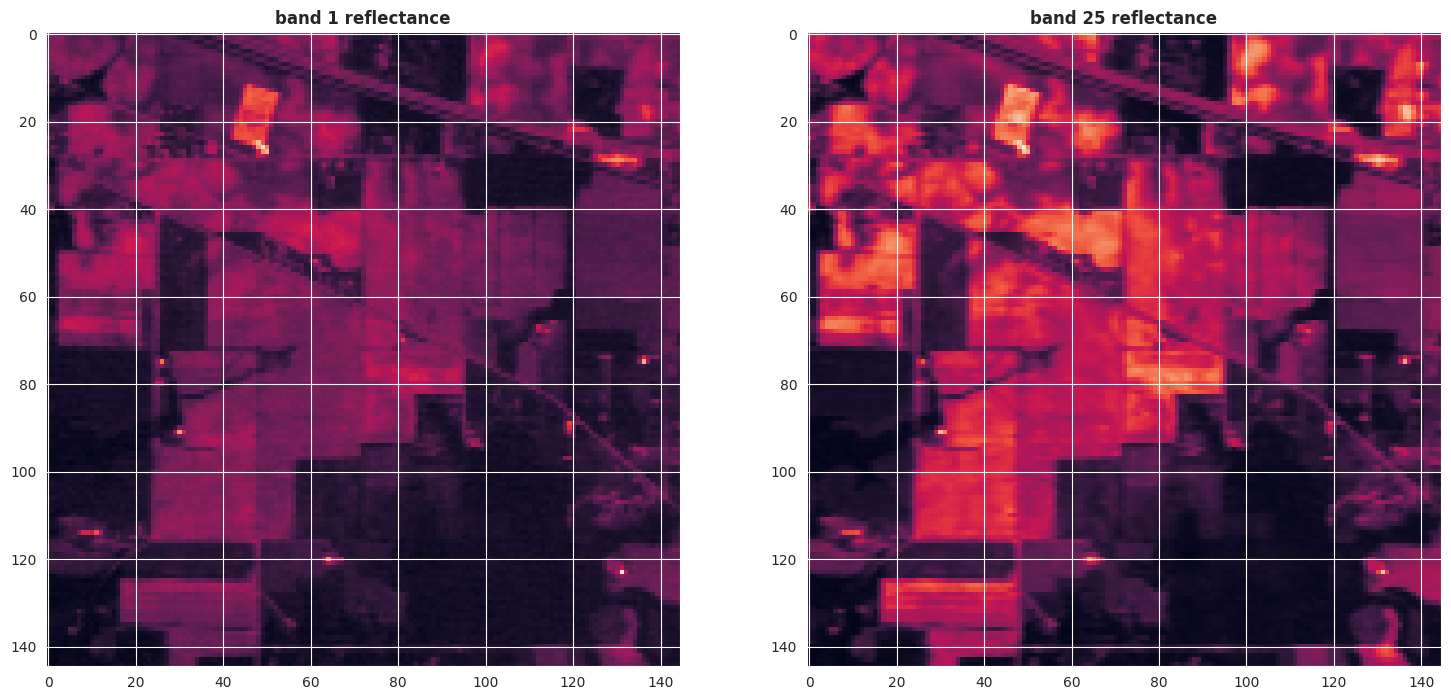

In [32]:
#Generate quick visualization using rasterio object
scene_id="scene_id"
f, ax = plt.subplots(1, 2,figsize=(18,18))
plot.show(r.read(10),title='band 1 reflectance',ax=ax[0])
plot.show(r.read(25),title="band 25 reflectance",ax=ax[1])

<Axes: title={'center': 'band 25 reflectance'}>

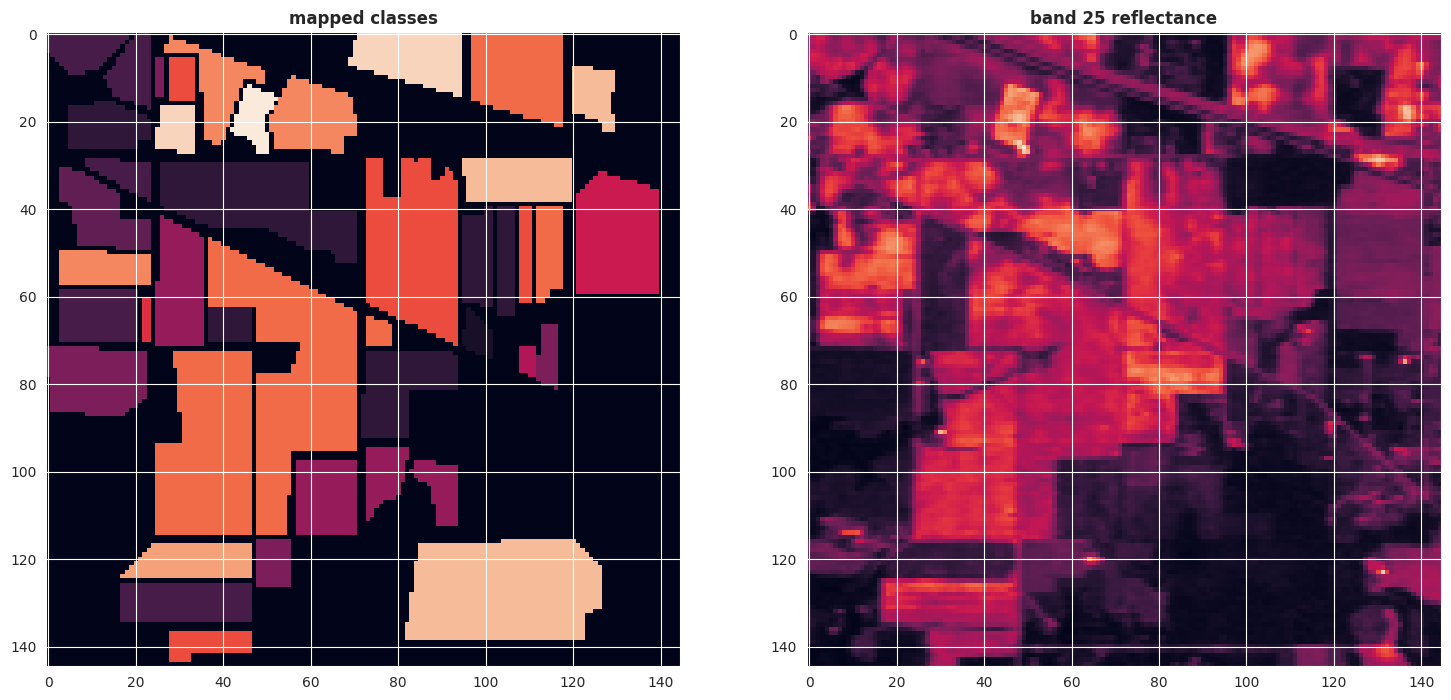

In [33]:
#Generate quick visualization using rasterio object
scene_id="scene_id"
f, ax = plt.subplots(1, 2,figsize=(18,18))
plot.show(r_ground.read(1),title='mapped classes',ax=ax[0])
plot.show(r.read(25),title="band 25 reflectance",ax=ax[1])

##2.2 Visualizing spectral class curves

We will leverage the large number of hyperspectral bands to visualize the spectral curves for each ground surface classes. This requires computing the average spectral curves for the 16 classes for each of the 220 spectral bands.

In [34]:
target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
                        ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed',
                        'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
                        'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
                        'Stone-Steel-Towers']
target_classes = np.arange(1,17)
target_names_df = pd.DataFrame.from_dict({"class_val":target_classes,
                       "target_name": target_names})
target_names_df

,class_val,target_name
0,1,Alfalfa
1,2,Corn-notill
2,3,Corn-mintill
3,4,Corn
4,5,Grass-pasture
5,6,Grass-trees
6,7,Grass-pasture-mowed
7,8,Hay-windrowed
8,9,Oats
9,10,Soybean-notill


(145, 145)
(220, 145, 145)
(220, 54)
(220,)


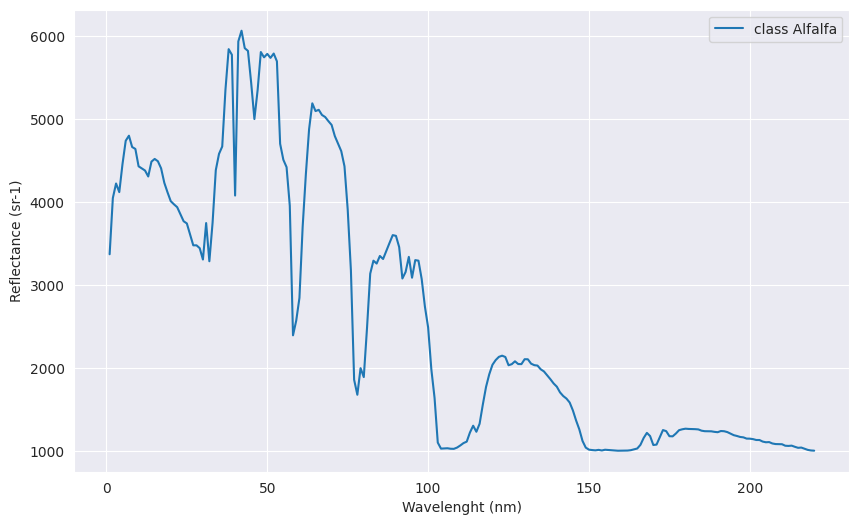

In [35]:
class_val = target_names_df['class_val'][0]
target_name = target_names_df['target_name'][0]
a_ground = r_ground.read()
print(r_ground.shape)
a_r = r.read()
print(a_r.shape)
#this will filter for specific class value and flatten the image for all the values for the specific class (in this case 54 for alfalfa)

print(a_r[:,np.squeeze(a_ground==class_val)].shape)

mean_val = a_r[:,np.squeeze(a_ground==class_val)].mean(axis=1)
print(mean_val.shape) #220 mean values corresponding to one mean value per class

# plot the spectrum
band_number = np.arange(1,221)
plt.figure(figsize=(10,6))
plt.plot(band_number, mean_val, label=f'class {target_name}')
#plt.fill_between(band_number, mean_va, mean+0.5*std, color='blue', alpha=0.1)
plt.xlabel('Wavelenght (nm)')
plt.ylabel('Reflectance (sr-1)')
plt.legend()

In [36]:
#can use gdal_calc with A and B raster and loop through classes.

list_mean_val= []
target_names = target_names_df['target_name']

for class_val in target_names_df['class_val'].to_list():
  mean_val = a_r[:,np.squeeze(a_ground==class_val)].mean(axis=1)
  list_mean_val.append(mean_val.T)
# Create the pandas DataFrame
df = pd.DataFrame(list_mean_val)
df=df.T
# specifying column names
df.columns = target_names
df

target_name,Alfalfa,Corn-notill,Corn-mintill,Corn,Grass-pasture,Grass-trees,Grass-pasture-mowed,Hay-windrowed,Oats,Soybean-notill,Soybean-mintill,Soybean-clean,Wheat,Woods,Buildings-Grass-Trees-Drives,Stone-Steel-Towers
0,3372.259259,3495.156206,3416.894484,3412.111111,3242.835010,3269.567604,3385.076923,3379.177914,3215.25,3451.528926,3435.845624,3425.872964,3228.382075,3212.777434,3221.852632,3816.821053
1,4050.148148,4308.596234,4217.918465,4212.128205,3921.997988,3957.985274,4091.769231,4112.517382,4009.80,4244.918388,4236.590357,4250.614007,3901.995283,3904.823029,3970.784211,4845.305263
2,4225.259259,4559.576011,4446.448441,4458.401709,4060.778672,4109.259705,4271.269231,4319.169734,4142.85,4477.648760,4458.188412,4472.635179,4022.183962,4038.173107,4106.976316,5190.294737
3,4121.222222,4482.834728,4370.208633,4368.585470,3926.303823,3980.141901,4223.461538,4203.689162,4022.10,4385.848140,4385.998379,4387.827362,3921.226415,3886.274343,3986.318421,5166.810526
4,4459.296296,4917.382148,4778.651079,4775.470085,4220.507042,4288.587684,4606.923077,4565.901840,4362.85,4793.048554,4794.682739,4792.500000,4228.542453,4138.403400,4274.255263,5722.515789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1041.907407,1078.478382,1079.244604,1075.423077,1018.625755,1024.433735,1039.038462,1043.595092,1034.75,1072.003099,1078.135332,1076.074919,1023.061321,1010.333076,1019.860526,1064.126316
216,1027.500000,1053.921199,1054.592326,1052.495726,1013.637827,1017.508701,1027.730769,1029.993865,1024.55,1049.432851,1054.235008,1053.032573,1015.457547,1007.959815,1013.836842,1043.547368
217,1014.092593,1027.741283,1027.555156,1027.388889,1007.758551,1008.878179,1014.461538,1014.885481,1011.00,1025.061983,1026.978930,1027.506515,1008.424528,1004.857805,1008.550000,1023.210526
218,1007.055556,1013.273361,1012.770983,1012.888889,1004.935614,1005.615797,1008.653846,1008.842536,1006.85,1012.330579,1012.947326,1013.472313,1005.419811,1004.422720,1006.186842,1011.463158


<Axes: >

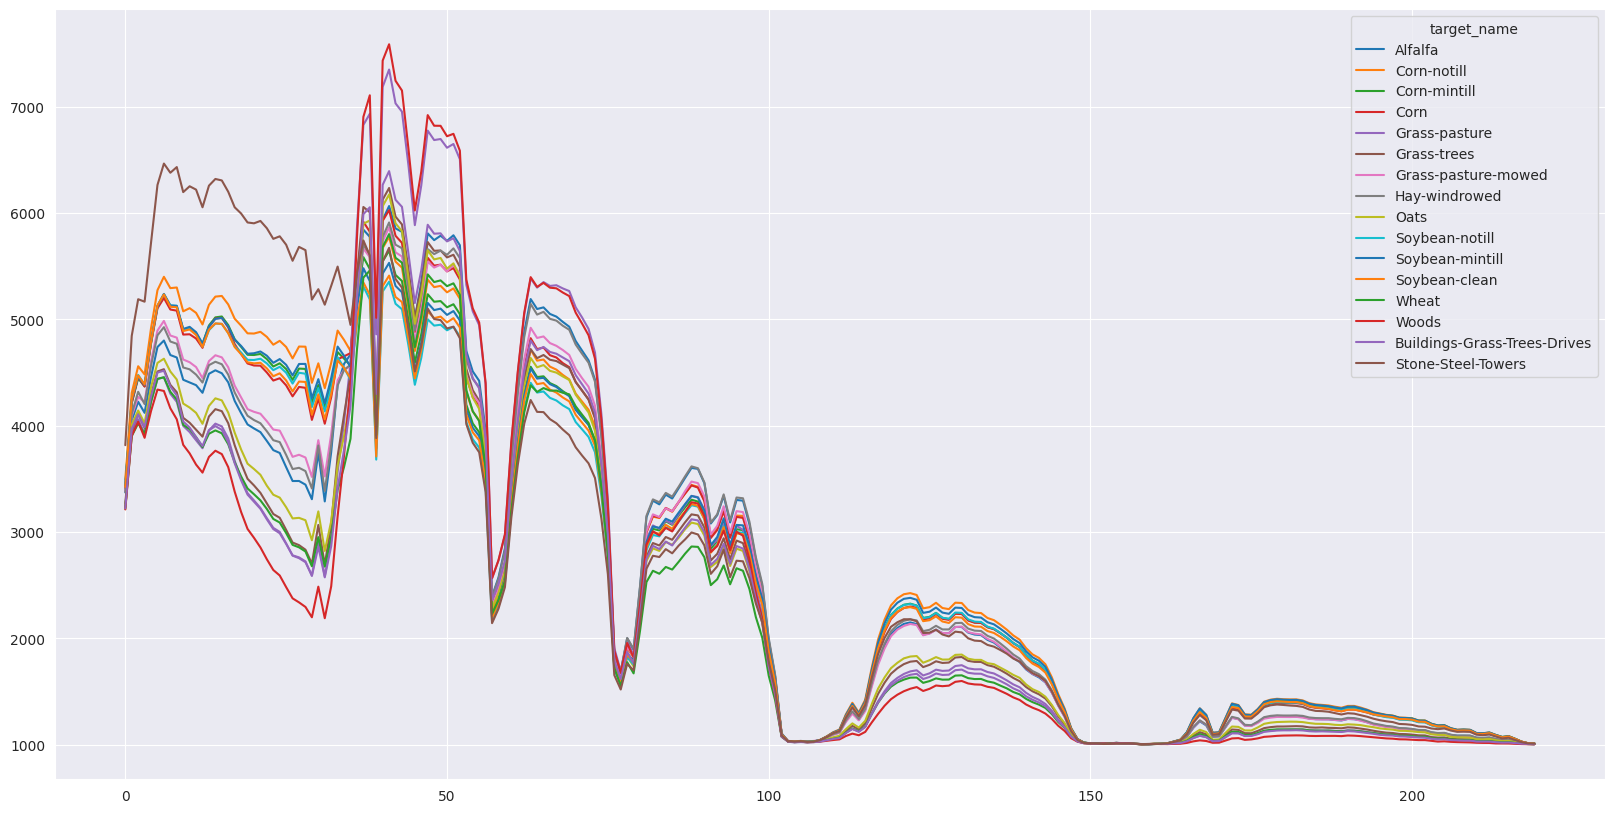

In [37]:
df.plot(figsize=(20, 10))

We plot the mean spectral curves for each of the vegetation classes. In term of discrimination, we can see different insteresting band ranges where differences between species are visible and some where are no differences e.g.
- 5 through 30: useful
- around 55 not useful (probably a water absorption band).


#3.Dimension reduction with PCA

We use the Principal Component Analysis package from sklearn to reduce the dimention of the bands to 30 components. This will allow to captures most of the useful information using only 30 bands instead of 220 as well as removing noise in the data (i.e. atmospheric noise etc.).

We take the following steps:
- channel last: The first step is to move the band (channel) dimesion to the last position (220,145,145) to (145,145,220)
- flatten image: we want to reshape the tensor to flatten the image dimension to 1D vector of size 145*145=21025
- run the PCA using a specified dimenion: in this case we are keeping 30 components.

In [38]:
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

n_components = 30
X_val = r.read()
print(X_val.shape)#220,145,145
X_val = np.moveaxis(X_val, 0, 2) #move axis 0 to 2, i.e. first channel axis containing bands should be last.
print(X_val.shape)
X_val= X_val.reshape(X_val.shape[0]*X_val.shape[1],X_val.shape[2]) #flattening the image into one vector
print(X_val.shape)
model_pca = PCA(copy=True,n_components=n_components,whiten=True) #carry out the PCA with 30 components
model_pca.fit(X_val)
X_pc = model_pca.fit_transform(X_val)
X_pc.shape

#https://gis.stackexchange.com/questions/273785/morans-i-on-2d-arrays-rasters
#https://blogs.oregonstate.edu/geo599spatialstatistics/2016/06/page/2/


(220, 145, 145)
(145, 145, 220)
(21025, 220)


(21025, 30)

Let's take a look at the variance explained:
- we can see the first two components contain more than 90 % of the variance.
- the first two components contain more information than one average information band (1/220).


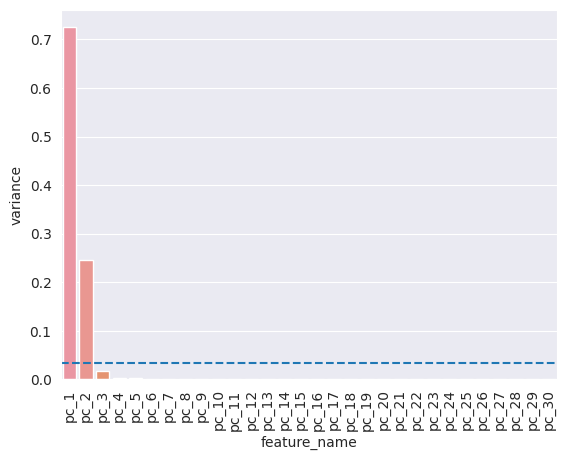

In [39]:
pc_labels= 'pc_' + str(np.arange(1,X_val.shape[1]+1))
#print(unique_val)
pc_labels = ['pc_' + str(i) for i in np.arange(1,n_components+1)]

variance_explained_df = pd.DataFrame({'feature_name':pc_labels,
                                      'variance': model_pca.explained_variance_ratio_})

ax = sns.barplot(x='feature_name',
                 y='variance',
                 data=variance_explained_df)
ax.set_xticklabels(list(variance_explained_df['feature_name']),rotation=90)
ax.axhline(1/n_components, ls='--')

<Axes: >

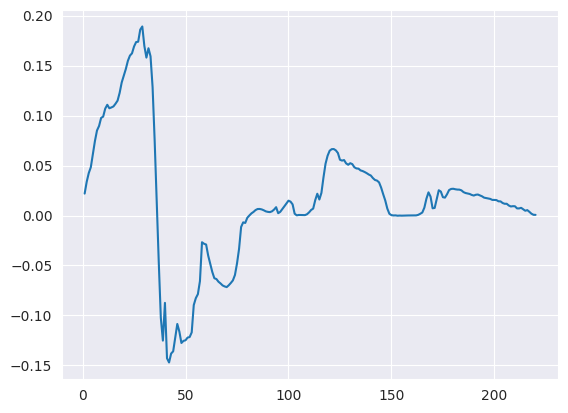

In [40]:
#show loadings
loadings = pd.DataFrame(model_pca.components_.T, columns=pc_labels, index=np.arange(1,220+1))
loadings
loadings['pc_1'].plot()

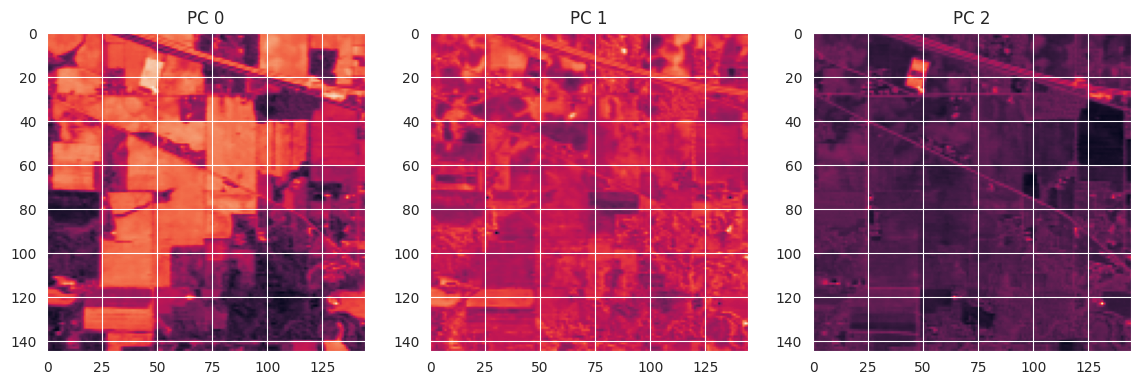

In [41]:
#Generate quick visualization using rasterio object
X_pc = X_pc.reshape(145,145,X_pc.shape[1])
X_pc.shape
scene_id="scene_id"
f, ax = plt.subplots(1,3,figsize=(14,14))
for i in np.arange(0,3):
  ax[i].set_title(f'PC {i}')
  ax[i].imshow(X_pc[:,:,i])

#4.Generate image chip/patch data, format data and create training/test splits
This includes two steps:
1. generate images chips
2. include image chips in a generator

Using the image data generator, we can access one item. Note that both the original RGB feature image and target image (buildings mapped) are returned in the form of numpy arrays. This is a four dimensional array with:
- the first dimension corresponding to the number of batches.
- second dimension to the height (row) of the image
- third dimension to the width (column) of the image
- fourth dimension corresponding to the number of channels

##4.1 Generate image chips and pad image

Let's read in the data and generate 25x25 image chips centered on every pixel of the image. Since there are 145x145 pixels we can expect to have 21025 image chips.

In order to create 25x25 image chips without losing pixels near the image edges we need to pad the image. The general formula to pad without loss of pixel given an image size is:

padding_val = (image_chip_size -1)/2

This will increase the image size by:
new_image_size = image_size + 2*padding_val

new_image_size = 145 + 2*(25-1) = 169


**Padding and code efficiency**

After pading we have a 169x169 expanded image with pad value of 0 around the edges. Note that expanding the image when padding is inefficient. It is better to generate code that can pad on the fly when processing the original image using a moving window corresponding to the image chip. We will not consider this issue in the current code implementation.

**Image chips creation, generator and code efficiency**

In this case study, we generate an image chip for each pixel before feeding it as input to the CNN. This is somewhat inefficient in term of memory usage. A more efficient workflow would usually feed a generator that would then provides the image chips by batches during training. Why are using this innefficent workflow in the current context?

Part of the issue here is that we need to create a train/test split. This is done on the full list of image chips. If we had other validation images of the same characteristic as Indian Pines, we would be able to keep that image for testing purpose. Another solution maybe to randomly select for testing and training and create a mask image for pixel that will be traning and testing. Then the image chips will be created on the fly by the generator during training and testing.

In [42]:
#if considering batch size
#batch_size = 16
#np.ceil(145*145/batch_size)
y=r_ground.read() #one channel/band for ground truth
print(y.shape)
print(y.dtype) #needs to be float
y= y.squeeze()
print(y.shape)
print(X_pc.shape)
y =r_ground.read()

y= np.moveaxis(y,0, 2) #move axis 1 to 3, i.e. channel axis should be last.

print(y.shape)

(1, 145, 145)
uint8
(145, 145)
(145, 145, 30)
(145, 145, 1)


**Image padding: an example**

(169, 169, 30)


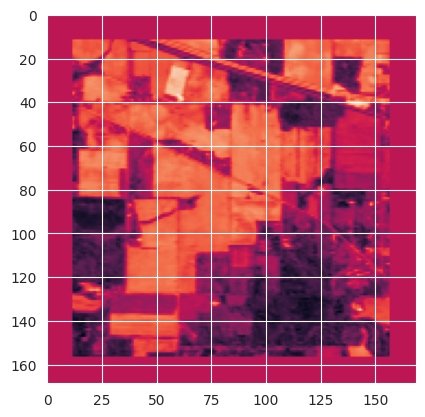

<Axes: >

In [43]:
# we need to pad the data before creating the iamge chips
r_pad = padding_image(X_pc, padding_val=12)
print(r_pad.shape)
plot.show(r_pad[:,:,0])

**Creating image chips**

In [44]:
print(X_pc.shape) #feature images
print(y.shape) #label image
w_x,w_y = create_image_window(raster_x=X_pc,
                        raster_y=y,
                        image_size=25,
                        pad=True)

w_x.shape,w_y.shape

(145, 145, 30)
(145, 145, 1)


((21025, 25, 25, 30), (21025, 25, 25, 1))

##4.2 Format data

The image chips/patches need to be formatted for the modeling:
- we remove pixels unclassified pixel (class 0)
- we recode classes to go from 0 through 15
- we check the data type format: float for channel bands for the input features and

In [45]:
#test_x.shape,test_y.shape
w_y_center =extract_center_windows(w_image=w_y,image_size=25)

#print(w_x_center.shape)
print(w_y_center.shape)
print(w_y_center.dtype)

w_y_center = w_y_center - 1.0 #rescale class from 0 through 15 and turn to float
w_y_center = np.squeeze(w_y_center)
print(type(w_y_center))
print(w_y_center.shape)

(21025, 1)
float64
<class 'numpy.ndarray'>
(21025,)


In [46]:
unique, counts = np.unique(w_y_center, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1.0000e+00  1.0738e+04]
 [ 0.0000e+00  5.4000e+01]
 [ 1.0000e+00  1.4340e+03]
 [ 2.0000e+00  8.0700e+02]
 [ 3.0000e+00  2.3400e+02]
 [ 4.0000e+00  4.9000e+02]
 [ 5.0000e+00  7.4700e+02]
 [ 6.0000e+00  2.6000e+01]
 [ 7.0000e+00  4.8900e+02]
 [ 8.0000e+00  2.0000e+01]
 [ 9.0000e+00  9.6800e+02]
 [ 1.0000e+01  2.4470e+03]
 [ 1.1000e+01  6.1400e+02]
 [ 1.2000e+01  2.1200e+02]
 [ 1.3000e+01  1.2940e+03]
 [ 1.4000e+01  3.5600e+02]
 [ 1.5000e+01  9.5000e+01]]


In [47]:
print(w_x.shape)
w_x = w_x[w_y_center>-1,:,:,:]
w_y_center = w_y_center[w_y_center>-1]
print(w_y_center.shape)
print(w_x.shape)

(21025, 25, 25, 30)
(10287,)
(10287, 25, 25, 30)


##4.3 Train test split and reshape for CNN

The image chips are not usuable without being transform into tensor of the appropriate size/shape. After splitting the dataset into training and testing we reshape the input the following way:

- add an extra dimension for the input X:

Since we are using 3D CNN layers, wee need 5 dimensionsal tensor with the following dimesions:
dimension 1: sample
dimension 2: height (row)
dimension 3: width (col)
dimension 4: channel (spectral bands or reduced features)
dimension 5: number of filters (corresponding to 3D cube features)

- one hot encoding of labels y:

We have a reference image containing one label for every pixel. We will generate a one hot encoded version of the input reference image to get a tensor with:

dimension 1: samples (pixels for training or testing)
dimension 2: classes corresponding to 16


In [48]:
#from sklearn.model_selection import train_test_split

test_prop = 0.7
seed_number = 42
Xtrain, Xtest, ytrain, ytest =train_test_split(w_x,
                 w_y_center,
                 test_size=test_prop,
                 random_state=seed_number,
                 stratify=w_y_center)

Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((3086, 25, 25, 30), (7201, 25, 25, 30), (3086,), (7201,))

In [49]:
unique, counts = np.unique(ytrain, return_counts=True)
print(np.asarray((unique, counts)).T) #we need within range 0-15 with

[[  0.  16.]
 [  1. 430.]
 [  2. 242.]
 [  3.  70.]
 [  4. 147.]
 [  5. 224.]
 [  6.   8.]
 [  7. 147.]
 [  8.   6.]
 [  9. 290.]
 [ 10. 734.]
 [ 11. 184.]
 [ 12.  64.]
 [ 13. 388.]
 [ 14. 107.]
 [ 15.  29.]]


In [50]:
Xtrain.shape

(3086, 25, 25, 30)

In [51]:
#Let's reshape for CNN
n_classes = 16
n_channel = 30
image_size = 25
Xtrain = Xtrain.reshape(-1, image_size, image_size, n_channel, 1)
Xtest = Xtest.reshape(-1, image_size, image_size, n_channel, 1)

print(Xtrain.shape)
print(Xtest.shape)

from keras.utils import np_utils
print(ytrain.shape)
ytrain = np_utils.to_categorical(ytrain)
ytrain.shape

(3086, 25, 25, 30, 1)
(7201, 25, 25, 30, 1)
(3086,)


(3086, 16)

Let's recreate a function to run the filter through with the model.

#5.Building and training models

We are using two models in this exercise:

- random forest
- HybridSN: a CNN model with 2D and 3D convolution


![hybridSn model](https://raw.githubusercontent.com/bparment1/deep_learning_with_satellite_imagery_and_geospatial_data/main/images/model_hybridSN.png)



##5.1 Setting up random forest model and training

In order to train the random forest model, we need to reformat the data and extract the center of image chips/patches.

- reshape the y values from one hot encoded to categorical
- extract the x values (features) from the image chips/patches.


In [52]:
print(ytrain.shape) # one hot encoded
np.argmax(ytrain,1).shape

(3086, 16)


(3086,)

In [53]:
Xtest.shape

(7201, 25, 25, 30, 1)

In [54]:
Xtrain.shape

(3086, 25, 25, 30, 1)

In [55]:
Xtrain_center =extract_center_windows(w_image=np.squeeze(Xtrain),
                                    image_size=image_size)
print(Xtrain_center.shape)
Xtest.shape

(3086, 30)


(7201, 25, 25, 30, 1)

In [56]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
#clf.fit(X, y)
#RandomForestClassifier(...)
model_rf.fit(Xtrain_center, np.argmax(ytrain,1))
y_scores_train_rf =model_rf.predict_proba(Xtrain_center)
print(y_scores_train_rf.shape)
y_scores_train_rf[0]
print(np.argmax(ytrain[0]))
print(np.argmax(y_scores_train_rf[0]))

(3086, 16)
11
10


##5.2 Building and training deep learning model

In [57]:
image_size = 25
n_channel = 30 #reduced through PCA
n_classes = 16
# = 9 if (dataset == 'PU' or dataset == 'PC') else 16

In [58]:
from tensorflow import keras
from keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from keras.layers import Dropout, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

#https://colab.research.google.com/github/antongardi/abraia-multiple/blob/main/notebooks/DeepHSIClassification.ipynb#scrollTo=xXLbR7HAakM0
#https://pygis.io/docs/e_interpolation.html
#Gaussian processes

## input layer
input_layer = Input((image_size, image_size, n_channel, 1))

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 7), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 5), activation='relu')(conv_layer1)
conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(conv_layer2)
print(conv_layer3.shape)
conv3d_shape = conv_layer3.shape
conv_layer3 = Reshape((conv3d_shape[1], conv3d_shape[2], conv3d_shape[3]*conv3d_shape[4]))(conv_layer3)
conv_layer4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv_layer3)

flatten_layer = Flatten()(conv_layer4)

## fully connected layers
dense_layer1 = Dense(units=256, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=128, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=n_classes, activation='softmax')(dense_layer2)

# define the model with input layer and output layer
model_cnn = Model(inputs=input_layer, outputs=output_layer)
model_cnn.summary()

(None, 19, 19, 18, 32)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25, 25, 30, 1)]   0         
                                                                 
 conv3d (Conv3D)             (None, 23, 23, 24, 8)     512       
                                                                 
 conv3d_1 (Conv3D)           (None, 21, 21, 20, 16)    5776      
                                                                 
 conv3d_2 (Conv3D)           (None, 19, 19, 18, 32)    13856     
                                                                 
 reshape (Reshape)           (None, 19, 19, 576)       0         
                                                                 
 conv2d (Conv2D)             (None, 17, 17, 64)        331840    
                                                                 
 flatten (Flatten)           (None, 18

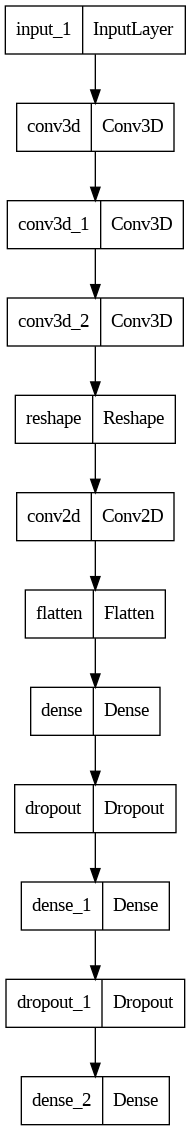

In [59]:
# use from tensorflow.keras.utils import plot_model
plot_model(model_cnn,"model_cnn.png") # this is from tensorflow.keras.utils
#requires graphviz
#sudo apt install graphviz

In [60]:
# compiling the model
adam = Adam(lr=0.001, decay=1e-06)
model_cnn.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
epoch_val_test = 5

# Add call back Modelcheckpoint
best_model_path = os.path.join(out_dir,f"best-model_checkpoint")
best_model_path= os.path.join(best_model_path, f'mymodel_{epoch_val_test}')


checkpoint = ModelCheckpoint(best_model_path,
                             monitor='acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
callbacks_list = [checkpoint] #only one callback

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Let's train the model using batchsize, call back and set number of epoch. This is to provide an example of training and assess the time required for 100 epoch.

In [61]:
epoch_val_test = 2
history = model_cnn.fit(x=Xtrain,
                    y=ytrain,
                    batch_size=256,
                    epochs=epoch_val_test,
                    callbacks=callbacks_list)
#34s per epoch, this would meean 34000/60= 56 minutes and 40s

Epoch 1/2
13/13 [==============================] - ETA: 0s - loss: 2.7905 - accuracy: 0.1351

13/13 [==============================] - 34s 3s/step - loss: 2.7905 - accuracy: 0.1351
Epoch 2/2
13/13 [==============================] - ETA: 0s - loss: 2.4316 - accuracy: 0.1915

13/13 [==============================] - 33s 3s/step - loss: 2.4316 - accuracy: 0.1915


In [62]:
#if run_model=True then train model and store weights and history
#run_model=True
#epoch_val=5
if run_model==True or model_path is None:
    history = model_cnn.fit(x=Xtrain,
                        y=ytrain,
                        batch_size=256,
                        epochs=epoch_val,
                        callbacks=callbacks_list)

    hist_df = pd.DataFrame(history.history)

    # save to json:
    hist_json_file = os.path.join(out_dir,f'history_{out_suffix}.json')
    hist_df.to_json(hist_json_file)
    # save to csv:
    hist_csv_file = os.path.join(out_dir,f'history_{out_suffix}.csv')
    hist_df.to_csv(hist_csv_file,index=False)
    # serialize weights to HDF5
    model_file_name = os.path.join(out_dir,'model_HSI_Indian_Pines_'+out_suffix+'.h5')
    model_cnn.save_weights(model_file_name)
    #model.save_weights('my_model_weights.h5')

    model_path= model_file_name

    print("Saved model to disk")

In [63]:
#if run_model=False then load models weights and loss history from h5 file
#model_path = None
if run_model==False:
    if model_path is not None:
        model_cnn.load_weights(model_path)
    if model_path is None:
        fileglob = "*.h5"
        model_path = os.path.join(out_dir,fileglob) #classified
        file_model_path = glob.glob(model_path,recursive=False)
        model_cnn.load_weights(file_model_path[0])
else:
  print("Run model is True")

In [64]:
model_path

'/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/models/output_data_hsi_20230423/model_HSI_Indian_Pines_hsi_20230423.h5'

In [65]:
# Get information on loss a a function of epoch
path_dir = os.path.dirname(model_path)
fileglob = "*.csv"
history_model_filename = os.path.join(path_dir,fileglob) #classified
history_model_path = glob.glob(history_model_filename,recursive=False)
print(history_model_path)
# add plot of history loss
hist_df = pd.read_csv(history_model_path[0])
hist_df['epoch']= np.arange(1,hist_df.shape[0]+1) #adding epoch column
print(hist_df.shape)
hist_df.head()

['/content/gdrive/MyDrive/Colab Notebooks/deep_learning_with_satellite_and_geospatial_data_course/hyperspectral_application_in_deep_learning/models/output_data_hsi_20230423/history_hsi_20230423.csv']
(100, 3)


,loss,accuracy,epoch
0,0.523717,0.826312,1
1,0.364273,0.884316,2
2,0.269750,0.912832,3
3,0.224518,0.929034,4
4,0.147631,0.953014,5


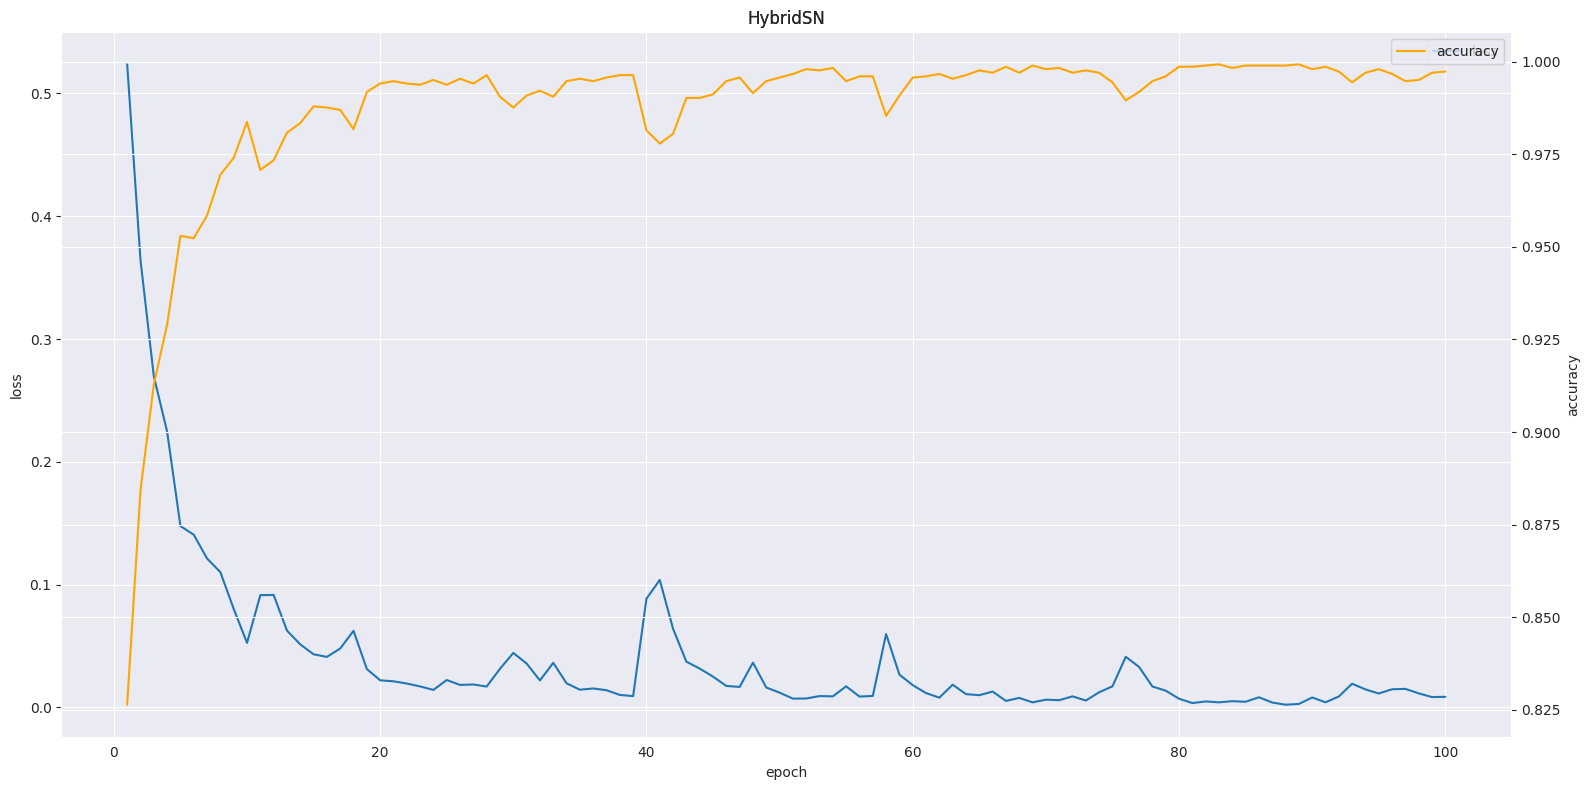

In [66]:
list_var = ['accuracy','loss']
fig, ax1 = plt.subplots(1,1,figsize=(16,8))
ax1.plot(hist_df['epoch'],hist_df['loss'],label='loss')
ax1.set_title('HybridSN')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(hist_df['epoch'],hist_df['accuracy'],label='accuracy',color='orange')
ax2.set_title('HybridSN')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()

fig.tight_layout()


#plt.savefig(f'CNN_model_learning_curves_comparison_{out_suffix}.png')

# 6.Accurary Assessment and model evaluation

We will assess the model using the test data. The steps as follow:

- 6.1. visualize the predicted outputs and errors as raster maps
- 6.2 AUC ROC and Precision recall curves evaluations
- 6.3  Model evalution with precision and recall metrics
- 6.4 Evaluate model with IOU metric

In #6.1 we visualize the new predictions. We generate class prediction by selecting the class corresponding to the maximum predicted score. A boolean map of error for a specific is generated to visualize the matrix of confusion at the pixel level. Note that this map includes both training and testing should not be used to assess the model predictions. To assess the model, we use the test samples (see later section).

In #3, we compute the ROC and AUC for 16 classes using the test samples. We also generate ROC plots and save results in a data frame.

In #6.2, we first use the test samples to predict class scores using the fitted model.  Second, we generate class predictions for the test samples by selecting the class corresponding to the maximum predicted score. We evaluate the model by generating precision and recall metrics for each of the predicted class.





##6.1 Visualize the predicted outputs and errors as raster maps

We will apply the model pixel by pixel. We will use a function to apply a moving window to illustrate the process.


### Generate predicted raster map

Let's first generate raster prediction using the fitted 3D CNN model. In this exercise, we are not concerned by memory and efficiency constraint because it is a small 145x145 image. To predict at every pixel, the model is run in inference mode. This took between 21-24 min for a 145 image. This suggests that is we have 7x145 in rows and columns, it will take 23,5 minutes or 1151,5 minutes
which means about 19hours for a 1000x1000 raster image.
Pixel by pixel prediction is a very inefficient way of running the predicting but it can be improved by reading images by chunk. In addition, when considering larger images, processing should be done by reading chunk from the disk rather than storing everything in memory.

I save the predicted raster as a compressed tif image.


In [67]:
if predict_raster_val is True:

  #this took between 21-24 min and 16s
  #assumes the first dimension is sample, the last one should be one
  rast_pred = predict_raster(raster_x=X_pc,
                    model=model_cnn,
                    image_size=25,
                    n_classes=16,
                    pad=True)

  print(type(r_ground))
  print(r_ground.files) #file attached to the rasterio class
  profile = r_ground.profile
  print(type(profile))
  print(profile)
  print(rast_pred.shape) #first we need to reshape to 145x145
  print(rast_pred.dtype)

  # And then change the band count to 1, set the
  # dtype to uint8, and specify LZW compression.
  profile.update(
        dtype=rasterio.float64,
        count=16,
        compress='lzw')
  rast_pred = np.moveaxis(rast_pred, 2, 0) #move axis 2 to 0, i.e. channel axis should be first for rasterio
  with rasterio.open('predicted_3d_ccn_raster.tif', 'w', **profile) as dst:
    dst.write(rast_pred)
else:
  src = rasterio.open(os.path.join(in_dir,'predicted_3d_ccn_raster.tif'))
  print(src.profile)
  rast_pred = src.read()

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 145, 'height': 145, 'count': 16, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0), 'blockysize': 145, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


Let's visualize the predicted raster.

(16, 145, 145)
(145, 145, 16)
(145, 145)
The predicted image data type is : int64


<Axes: title={'center': 'Class 10 score predicted'}>

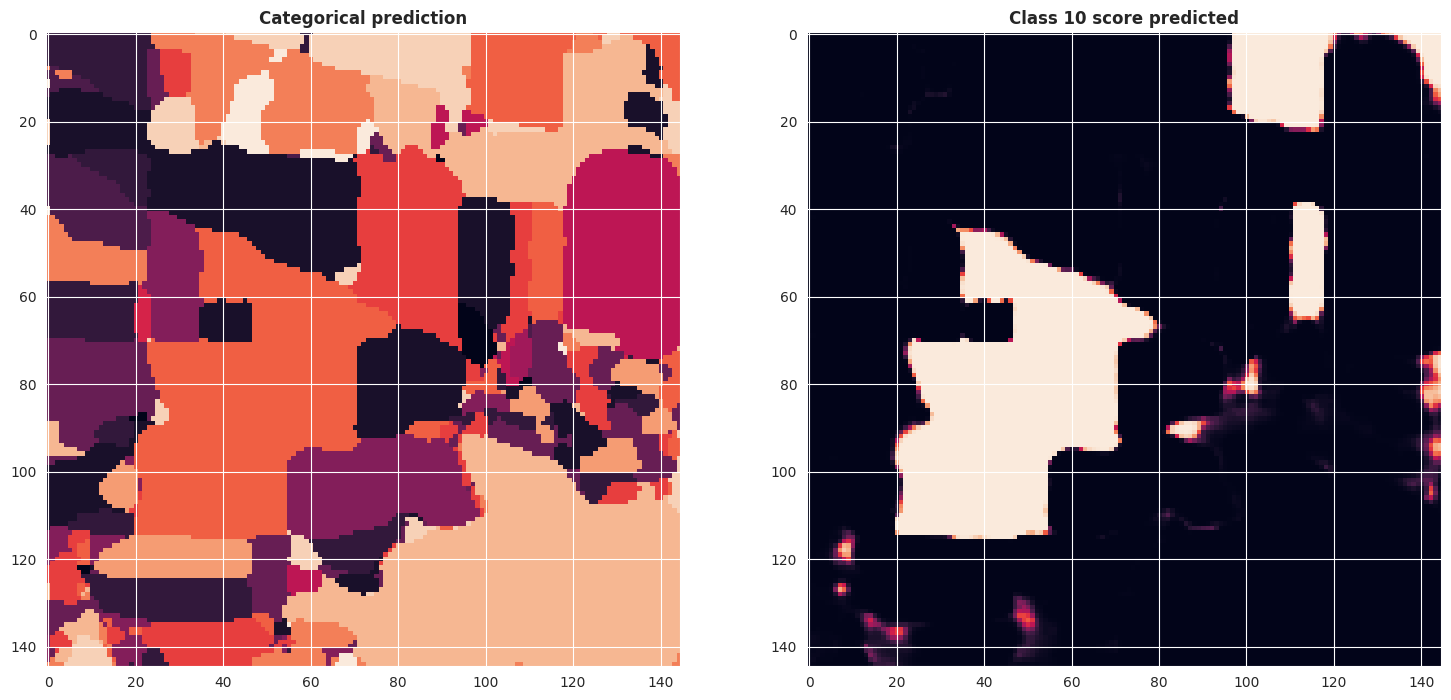

In [68]:
print(rast_pred.shape)
rast_pred=np.moveaxis(rast_pred, 0, 2)#move axis 3 to 0, i.e. channel axis should be first for rasterio
print(rast_pred.shape)
rast_pred_cat = np.argmax(rast_pred, axis=2) #move axis 3 to 0, i.e. channel axis should be first for rasterio
print(rast_pred_cat.shape)
print("The predicted image data type is :",rast_pred_cat.dtype)
f, ax = plt.subplots(1, 2,figsize=(18,18))
plot.show(rast_pred_cat,ax=ax[0],title='Categorical prediction')
plot.show(rast_pred[:,:,10],title='Class 10 score predicted',ax=ax[1])

The ground truth data type is : ('uint8',)
This is the ground Truth data pixel frequency table
This is the predicted image data pixel frequency table
uint8


,value,count
0,0,10659
1,1,10366


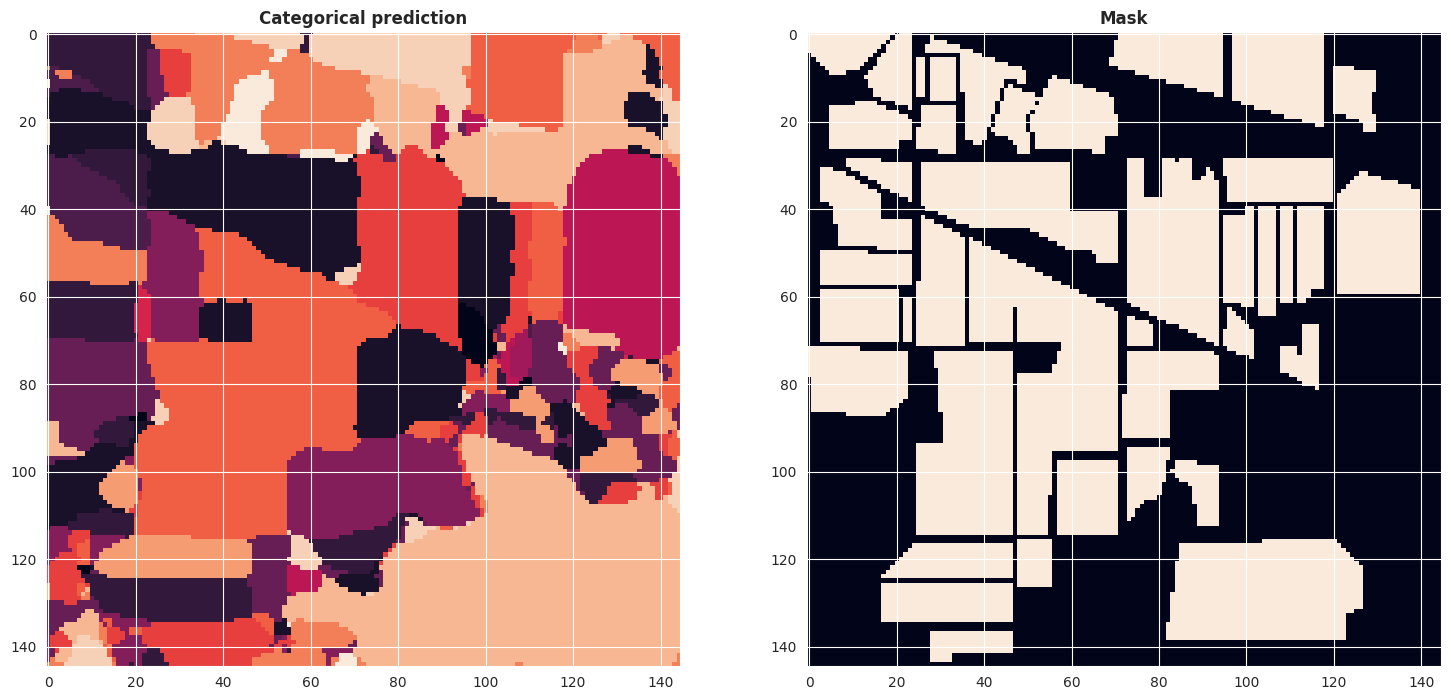

In [69]:
print("The ground truth data type is :",r_ground.dtypes)
ground_val_df = freq_array(r_ground)
pred_val_df = freq_array(rast_pred_cat)
print("This is the ground Truth data pixel frequency table")
rast_pred_cat = rast_pred_cat+1
pred_val_df = freq_array(rast_pred_cat)
print("This is the predicted image data pixel frequency table")
pred_val_df

r_mask = np.squeeze(r_ground.read())
r_mask.shape
r_mask[r_mask>1]=1
print(r_mask.dtype)
f, ax = plt.subplots(1, 2,figsize=(18,18))
plot.show(rast_pred_cat,ax=ax[0],title='Categorical prediction')
plot.show(r_mask,title='Mask',ax=ax[1])
display(freq_array(r_mask))


int64


,value,count
0,0,10659
1,1,54
2,2,1461
3,3,802
4,4,226
5,5,516
6,6,749
7,7,17
8,8,498
9,9,26


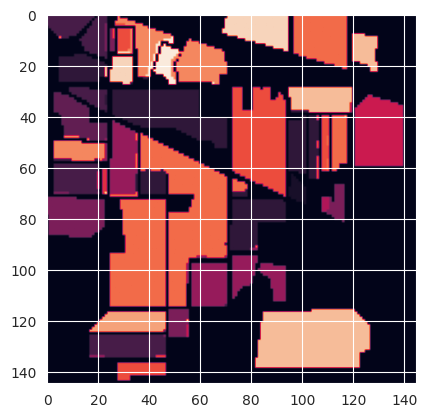

<Axes: >

In [70]:
rast_pred_cat  = rast_pred_cat*r_mask.astype('int64')
print(rast_pred_cat.dtype)
display(freq_array(rast_pred_cat))
plot.show(rast_pred_cat)

### Generate error map using predictions

In [71]:
r_g = np.squeeze(r_ground.read())
print(r_g.dtype)
r_g = r_g.astype('uint8')
rast_pred_cat = rast_pred_cat.astype('uint8')
print(r_g.dtype)
print(rast_pred_cat.dtype)


uint8
uint8
uint8


In [72]:
rast_pred_cat_bool = np_utils.to_categorical(rast_pred_cat)
print(rast_pred_cat_bool.shape)
r_g_bool = np_utils.to_categorical(r_g)
print(r_g_bool.shape)
rast_pred_cat_bool[:,:,10].shape
r_crosstab, df_cross_tab = binary_crosstab_array(r_g_bool[:,:,10],rast_pred_cat_bool[:,:,10])
r_crosstab

(145, 145, 17)
(145, 145, 17)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [73]:
display(freq_array(r_crosstab))
df_cross_tab

,value,count
0,0,20031
1,1,943
2,2,26
3,3,25


,val,label
0,0,TN
1,1,TP
2,2,FP
3,3,FN


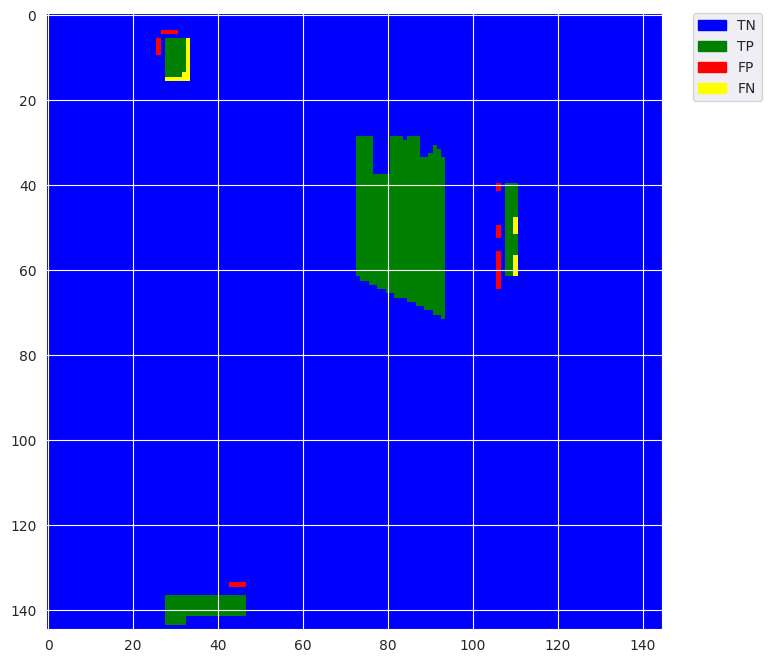

In [74]:
values = np.array([0,1,2,3])
# Create a list of labels to use for your legend
class_labels = ["TN",
                "TP",
                "FP",
                "FN"]

# Create a colormap from a list of colors
class_colors = ['blue',
                'green',
                'red',
                'yellow']
plt.figure(figsize=(16,8))

cmap_ramp = colors.ListedColormap(class_colors)
im = plt.imshow(r_crosstab, interpolation='none',cmap=cmap_ramp)

# get the colors of the values, according to the
# colormap used by imshow
colors_val = [ im.cmap(im.norm(value)) for value in values]
colors_val = class_colors
# create a patch (proxy artist) for every color
patches = [ mpatches.Patch(color=class_colors[i], label=class_labels[i]) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.grid(True)
plt.show()

##6.2 AUC ROC and Precision recall curves evaluations

In the previous section, we looked a error map predicted on a full raster. To evaluate a model, we must keep test and training data fully separated. We gnerate ROC and AUC ROC using the test samples.


|             | Pred 0      | Pred 1     |
| :---        |    :----:   |       ---: |
| True 0      | TN          | FP         |
| True 1      | FN          | TP         |

- precision = TP/(TP+FP)
- Recall = TP/(TP+FN), also called true positive rate or sensitivity, hit rate, % of true positive cases recovered (not missed), if high a lot of misses
- FPR = FP/(FP+TN) , aslo called fall out FPR= 1- TNR
- TNR = TN/(TN+FP), also called specificity

In [75]:
Xtest.shape,  Xtrain.shape, ytrain.shape, ytest.shape

((7201, 25, 25, 30, 1), (3086, 25, 25, 30, 1), (3086, 16), (7201,))

In [76]:
#Let's generate one encoded values
y_test_df = pd.DataFrame(np_utils.to_categorical(ytest))
y_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [77]:
y_score = model_cnn.predict(Xtest)
y_pred_test_df = pd.DataFrame(y_score)
y_pred_test_df['y_pred_test'] = y_pred_test_df.idxmax(axis = 1) #one to go across the column for each row
y_pred_test_df

226/226 [==============================] - 12s 53ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y_pred_test
0,2.155040e-10,1.898913e-06,9.324650e-12,3.359411e-10,4.655623e-08,5.368777e-09,1.230692e-10,2.144322e-10,3.139372e-13,1.871499e-07,9.999978e-01,1.059662e-09,3.612149e-12,7.192028e-10,3.647403e-08,2.551763e-15,10
1,5.206075e-22,1.697424e-19,2.751436e-30,6.589526e-25,2.898225e-22,2.190786e-29,7.533986e-30,1.684968e-17,5.574701e-30,2.702609e-21,7.137109e-25,2.222782e-15,2.502831e-31,9.999999e-01,4.560435e-22,9.022456e-26,13
2,6.102588e-13,3.845647e-17,9.999999e-01,3.982005e-09,5.127752e-13,3.119630e-11,2.177522e-13,3.089569e-17,1.884819e-10,5.919398e-14,2.223037e-14,1.765838e-09,1.852275e-12,3.549076e-19,4.445947e-15,1.007549e-12,2
3,4.248652e-30,6.075413e-20,1.114144e-28,2.395374e-29,2.765222e-21,2.590917e-21,5.982952e-29,7.832591e-28,3.204609e-35,2.565825e-22,9.999999e-01,1.630569e-24,2.401949e-32,8.293118e-28,3.400982e-22,0.000000e+00,10
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.279319e-35,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,1.004694e-09,1.819057e-06,7.015098e-10,7.511416e-10,1.744410e-08,9.686618e-06,3.765046e-09,1.213127e-09,5.944825e-12,6.476658e-07,9.999878e-01,2.184853e-08,1.213884e-09,5.647121e-10,3.739818e-09,1.241346e-13,10
7197,2.760786e-20,9.999999e-01,1.733204e-16,5.961543e-12,1.488364e-16,2.588161e-13,5.663580e-19,2.328069e-15,3.739388e-19,4.187773e-18,4.182208e-15,6.762792e-19,2.677342e-16,8.760989e-19,1.300484e-17,8.572479e-20,1
7198,6.513652e-17,8.086989e-21,1.803953e-13,1.923454e-13,7.256832e-18,3.161687e-19,1.288101e-17,5.914184e-18,4.580949e-18,5.097398e-16,1.309119e-17,9.999999e-01,1.218617e-20,2.131982e-14,3.601509e-15,1.935901e-13,11
7199,0.000000e+00,1.875276e-33,0.000000e+00,0.000000e+00,9.111151e-38,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10


AUC train:  nan
AUC test:  0.999980959358975


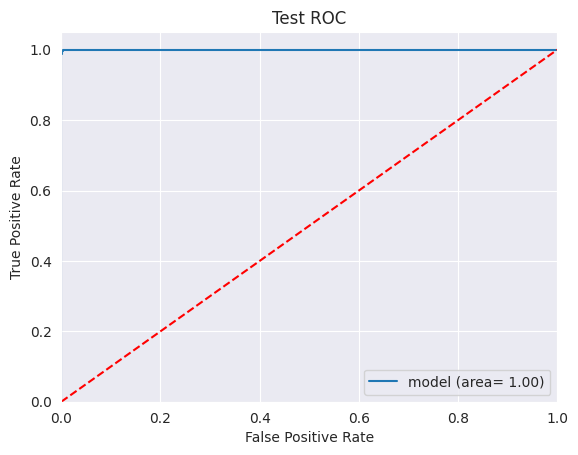

In [78]:
selected_class = 10
roc_df, auc_df = plot_roc(y_test=y_test_df.iloc[:,selected_class],
         y_scores_test=y_pred_test_df.iloc[:,selected_class],
         y_scores_train=None,
         y_train=None,
         model_name=None,
         show_fig=True,
         out_file=None)

,thresholds,precision,recall
0,0.000000e+00,0.237884,1.000000
1,0.000000e+00,0.267991,1.000000
2,1.377647e-38,0.268033,1.000000
3,1.427464e-38,0.268075,1.000000
4,1.538026e-38,0.268117,1.000000
...,...,...,...
4834,9.999996e-01,1.000000,0.870987
4835,9.999997e-01,1.000000,0.863981
4836,9.999998e-01,1.000000,0.836544
4837,9.999999e-01,1.000000,0.000584


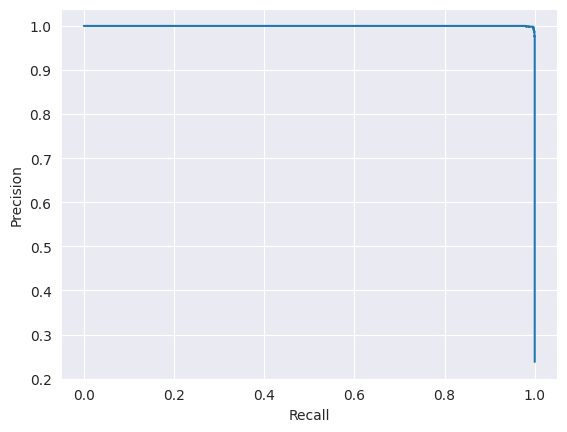

In [79]:
# Use sklearn to plot precision-recall curves

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
precision, recall, thresholds = precision_recall_curve(
                       y_true=y_test_df.iloc[:,selected_class],
                       probas_pred=y_pred_test_df.iloc[:,selected_class])
prd = PrecisionRecallDisplay(precision, recall)
prd.plot()

thresholds = np.insert(thresholds,0,0)
precision_recall_df = pd.DataFrame.from_dict({'thresholds':thresholds,
                        'precision':precision,
                        'recall':recall,
                        })

(precision_recall_df)

In [80]:
precision_recall_df.loc[precision_recall_df['precision']==1,:]

,thresholds,precision,recall
4714,0.982869,1.0,0.979568
4715,0.983284,1.0,0.978984
4716,0.985928,1.0,0.978400
4717,0.986259,1.0,0.977817
4718,0.987566,1.0,0.977233
...,...,...,...
4834,1.000000,1.0,0.870987
4835,1.000000,1.0,0.863981
4836,1.000000,1.0,0.836544
4837,1.000000,1.0,0.000584


The precision recall curve also shows some interesting values for class 10. We can see that we can get a precision of 1 with a recall of 0.0909 with threshold of 0.998761. This suggests that the model is performing well. We are able to make 100% accurate predictions with a recall of close to 91%!

In [81]:
list_auc_df = []
list_roc_df = []

for selected_class in range(0,16):
    roc_df, auc_df =plot_roc(
         y_test=y_test_df.iloc[:,selected_class],
         y_scores_test=y_pred_test_df.iloc[:,selected_class],
         y_scores_train=None,
         y_train=None,
         model_name=None,
         show_fig=False,
         out_file=None)

    list_auc_df.append(auc_df)
    list_roc_df.append(roc_df)
auc_df= pd.concat(list_auc_df)
auc_df

AUC train:  nan
AUC test:  1.0
AUC train:  nan
AUC test:  0.9999995178234938
AUC train:  nan
AUC test:  1.0
AUC train:  nan
AUC test:  1.0
AUC train:  nan
AUC test:  0.9999974492984295
AUC train:  nan
AUC test:  0.9999965641583304
AUC train:  nan
AUC test:  1.0
AUC train:  nan
AUC test:  1.0
AUC train:  nan
AUC test:  1.0
AUC train:  nan
AUC test:  0.9999972866602722
AUC train:  nan
AUC test:  0.999980959358975
AUC train:  nan
AUC test:  0.9999680580313444
AUC train:  nan
AUC test:  1.0
AUC train:  nan
AUC test:  0.9999991233099608
AUC train:  nan
AUC test:  0.9999878686206274
AUC train:  nan
AUC test:  0.9999384171073028


,test,train,model
0,1.0,nan,model
0,0.9999995178234938,nan,model
0,1.0,nan,model
0,1.0,nan,model
0,0.9999974492984295,nan,model
0,0.9999965641583304,nan,model
0,1.0,nan,model
0,1.0,nan,model
0,1.0,nan,model
0,0.9999972866602722,nan,model


##6.3 Model evalution with precision and recall metrics


In [82]:
Xtest.shape,  Xtrain.shape, ytrain.shape, ytest.shape

((7201, 25, 25, 30, 1), (3086, 25, 25, 30, 1), (3086, 16), (7201,))

In [95]:
y_score = model_cnn.predict(Xtest)
y_pred_test_df = pd.DataFrame(y_score)
y_pred_test_df['y_pred_test'] = y_pred_test_df.idxmax(axis = 1) #one to go across the column for each row
y_pred_test_df

226/226 [==============================] - 13s 58ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y_pred_test
0,2.155040e-10,1.898913e-06,9.324650e-12,3.359411e-10,4.655623e-08,5.368777e-09,1.230692e-10,2.144322e-10,3.139372e-13,1.871499e-07,9.999978e-01,1.059662e-09,3.612149e-12,7.192028e-10,3.647403e-08,2.551763e-15,10
1,5.206075e-22,1.697424e-19,2.751436e-30,6.589526e-25,2.898225e-22,2.190786e-29,7.533986e-30,1.684968e-17,5.574701e-30,2.702609e-21,7.137109e-25,2.222782e-15,2.502831e-31,9.999999e-01,4.560435e-22,9.022456e-26,13
2,6.102588e-13,3.845647e-17,9.999999e-01,3.982005e-09,5.127752e-13,3.119630e-11,2.177522e-13,3.089569e-17,1.884819e-10,5.919398e-14,2.223037e-14,1.765838e-09,1.852275e-12,3.549076e-19,4.445947e-15,1.007549e-12,2
3,4.248652e-30,6.075413e-20,1.114144e-28,2.395374e-29,2.765222e-21,2.590917e-21,5.982952e-29,7.832591e-28,3.204609e-35,2.565825e-22,9.999999e-01,1.630569e-24,2.401949e-32,8.293118e-28,3.400982e-22,0.000000e+00,10
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.279319e-35,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,1.004694e-09,1.819057e-06,7.015098e-10,7.511416e-10,1.744410e-08,9.686618e-06,3.765046e-09,1.213127e-09,5.944825e-12,6.476658e-07,9.999878e-01,2.184853e-08,1.213884e-09,5.647121e-10,3.739818e-09,1.241346e-13,10
7197,2.760786e-20,9.999999e-01,1.733204e-16,5.961543e-12,1.488364e-16,2.588161e-13,5.663580e-19,2.328069e-15,3.739388e-19,4.187773e-18,4.182208e-15,6.762792e-19,2.677342e-16,8.760989e-19,1.300484e-17,8.572479e-20,1
7198,6.513652e-17,8.086989e-21,1.803953e-13,1.923454e-13,7.256832e-18,3.161687e-19,1.288101e-17,5.914184e-18,4.580949e-18,5.097398e-16,1.309119e-17,9.999999e-01,1.218617e-20,2.131982e-14,3.601509e-15,1.935901e-13,11
7199,0.000000e+00,1.875276e-33,0.000000e+00,0.000000e+00,9.111151e-38,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,10


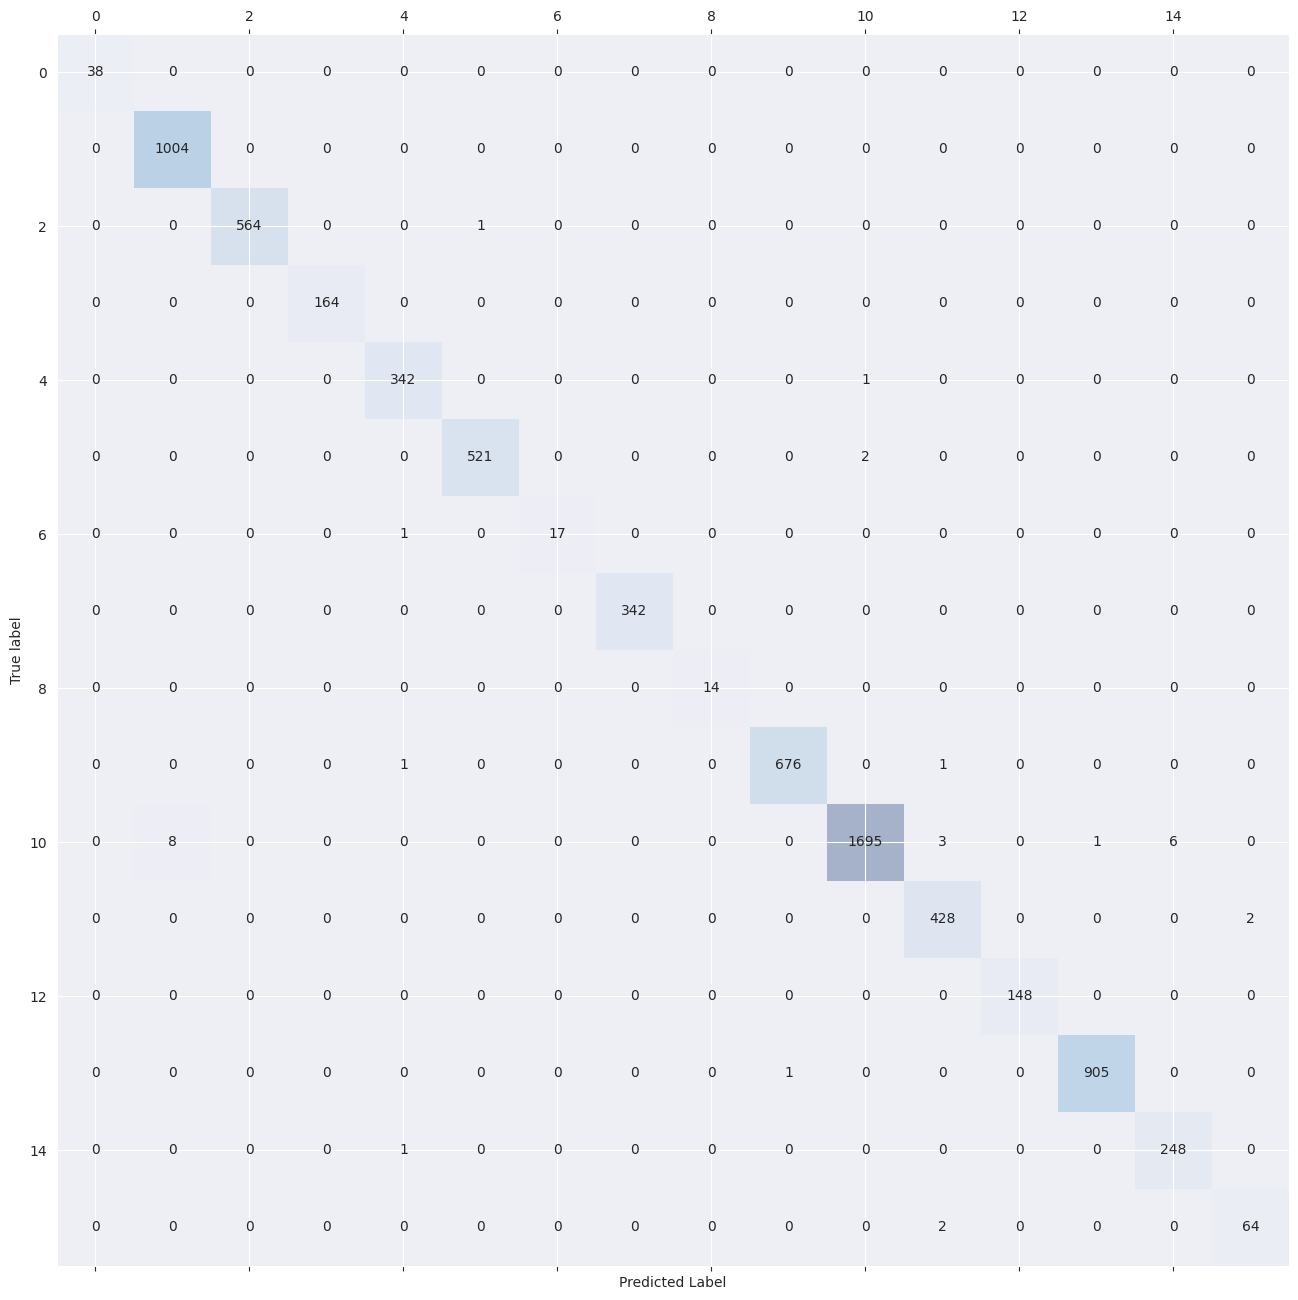

In [84]:
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
y_pred_test = y_pred_test_df['y_pred_test']
y_test = ytest
report_dict=classification_report(y_test,
                                  y_pred_test,
                                  output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
confusion_matrix_val = confusion_matrix(y_test,y_pred_test)

fig, ax = plt.subplots(figsize=(16,16))
ax.matshow(confusion_matrix_val,cmap=plt.cm.Blues,alpha=0.3)
for i in range(confusion_matrix_val.shape[0]):
  for j in range(confusion_matrix_val.shape[1]):
    ax.text(x=j,y=i,
               s=confusion_matrix_val[i,j],
               va='center',
               ha='center')
    plt.xlabel('Predicted Label')
    plt.ylabel('True label')

In [85]:
report_df
#precision: number of correctly predicted categories out of predictions (True Positive/(True Positive + False Positve))
#recall: (True Positive/(True Positive + False Negative))

,precision,recall,f1-score,support
0.0,1.000000,1.000000,1.000000,38.000000
1.0,0.992095,1.000000,0.996032,1004.000000
2.0,1.000000,0.998230,0.999114,565.000000
3.0,1.000000,1.000000,1.000000,164.000000
4.0,0.991304,0.997085,0.994186,343.000000
5.0,0.998084,0.996176,0.997129,523.000000
6.0,1.000000,0.944444,0.971429,18.000000
7.0,1.000000,1.000000,1.000000,342.000000
8.0,1.000000,1.000000,1.000000,14.000000
9.0,0.998523,0.997050,0.997786,678.000000


In [86]:
list_models = [model_cnn,model_rf]
list_data = [(Xtrain,ytrain,'train'),(Xtest,ytest,'test')]
list_report_df = []
#double loop
for model in list_models:
  for data_val in list_data:
    x_val,y_val,type_val = data_val
    print(x_val.shape)
    print(y_val.shape)
    print(type_val)
    print(type(model))
    if type_val=='train':
      y_val = np.argmax(y_val,1)
    #if model if sklearn model then reformat:
    if isinstance(model,sklearn.ensemble._forest.RandomForestClassifier):
      x_val = np.squeeze(x_val)
      x_val = extract_center_windows(w_image=x_val,
                                      image_size=image_size)
    print(x_val.shape)
    report_val_df = generate_accuracy(model,
                                  y_test=y_val,
                                  x_test=x_val,
                                  class_names=target_names.to_list(),
                                  type_val = type_val)
    list_report_df.append(report_val_df)
    print(f"finished prediction {type(model)}")

report_df = pd.concat(list_report_df)
report_df


(3086, 25, 25, 30, 1)
(3086, 16)
train
<class 'keras.engine.functional.Functional'>
(3086, 25, 25, 30, 1)
97/97 [==============================] - 5s 52ms/step
finished prediction <class 'keras.engine.functional.Functional'>
(7201, 25, 25, 30, 1)
(7201,)
test
<class 'keras.engine.functional.Functional'>
(7201, 25, 25, 30, 1)
226/226 [==============================] - 12s 51ms/step
finished prediction <class 'keras.engine.functional.Functional'>
(3086, 25, 25, 30, 1)
(3086, 16)
train
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
(3086, 30)
finished prediction <class 'sklearn.ensemble._forest.RandomForestClassifier'>
(7201, 25, 25, 30, 1)
(7201,)
test
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
(7201, 30)
finished prediction <class 'sklearn.ensemble._forest.RandomForestClassifier'>


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

,metric,Alfalfa,Corn-notill,Corn-mintill,Corn,Grass-pasture,Grass-trees,Grass-pasture-mowed,Hay-windrowed,Oats,...,Soybean-mintill,Soybean-clean,Wheat,Woods,Buildings-Grass-Trees-Drives,Stone-Steel-Towers,accuracy,model_name,type,num_param
0,precision,1.0,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,model,train,5122176
1,recall,1.0,1.000000,1.00000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,model,train,5122176
0,precision,1.0,0.992095,1.00000,1.0,0.991304,0.998084,1.000000,1.000000,1.0,...,0.998233,0.986175,1.0,0.998896,0.976378,0.969697,0.995695,model,test,5122176
1,recall,1.0,1.000000,0.99823,1.0,0.997085,0.996176,0.944444,1.000000,1.0,...,0.989492,0.995349,1.0,0.998896,0.995984,0.969697,0.995695,model,test,5122176
0,precision,0.0,0.000000,0.00000,0.0,1.000000,0.867925,0.000000,0.843931,0.0,...,0.339658,0.000000,0.0,0.708647,0.000000,0.000000,0.469540,RandomForestClassifier,train,None
1,recall,0.0,0.000000,0.00000,0.0,0.054422,0.821429,0.000000,0.993197,0.0,...,1.000000,0.000000,0.0,0.971649,0.000000,0.000000,0.469540,RandomForestClassifier,train,None
0,precision,0.0,0.000000,0.00000,0.0,1.000000,0.828343,0.000000,0.869898,0.0,...,0.336882,0.000000,0.0,0.728395,0.000000,0.000000,0.467991,RandomForestClassifier,test,None
1,recall,0.0,0.000000,0.00000,0.0,0.058309,0.793499,0.000000,0.997076,0.0,...,0.997665,0.000000,0.0,0.976821,0.000000,0.000000,0.467991,RandomForestClassifier,test,None


##6.4 Evaluate model with IOU metric



In [87]:
Xtest_center =extract_center_windows(w_image=np.squeeze(Xtest),
                                    image_size=image_size)
print(Xtest_center.shape)
print(Xtest.shape)
from sklearn.ensemble import RandomForestClassifier
y_scores_test_rf =model_rf.predict_proba(Xtest_center)
y_pred_test__rf_df = pd.DataFrame(y_scores_test_rf)
print(y_pred_test__rf_df.shape)
#print(np.argmax(ytest[0]))
#print(np.argmax(y_scores_test_rf[0]))

y_pred_test__rf_df['y_pred_test'] = y_pred_test__rf_df.idxmax(axis = 1) #one to go across the column for each row
y_pred_test__rf_df

(7201, 30)
(7201, 25, 25, 30, 1)
(7201, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,y_pred_test
0,0.001374,0.165499,0.092535,0.022783,0.035695,0.044154,0.002202,0.016256,0.001779,0.119925,0.303063,0.058863,0.015685,0.086901,0.024639,0.008647,10
1,0.003489,0.102504,0.058476,0.016843,0.071427,0.070835,0.003200,0.035488,0.002179,0.075874,0.193347,0.044439,0.025972,0.243265,0.046654,0.006008,13
2,0.001902,0.142750,0.113876,0.029185,0.031971,0.040833,0.001768,0.017274,0.001702,0.103456,0.281289,0.081893,0.014268,0.098663,0.030940,0.008231,10
3,0.001453,0.161991,0.093688,0.022954,0.034489,0.042162,0.002201,0.016055,0.001728,0.118439,0.302816,0.062409,0.017247,0.088913,0.024659,0.008796,10
4,0.036656,0.070275,0.027050,0.012115,0.039313,0.074870,0.007152,0.424088,0.001888,0.038288,0.089803,0.022221,0.017092,0.083088,0.034077,0.022022,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,0.002227,0.171784,0.084656,0.022444,0.031612,0.051274,0.002354,0.021635,0.001624,0.118400,0.288671,0.061483,0.014807,0.092705,0.023751,0.010572,10
7197,0.001837,0.191514,0.088990,0.024232,0.039016,0.039554,0.002255,0.018986,0.001512,0.108717,0.271659,0.067297,0.013963,0.097848,0.021501,0.011118,10
7198,0.002774,0.155425,0.104650,0.029585,0.035721,0.044168,0.001842,0.024198,0.001417,0.094578,0.259721,0.092014,0.012980,0.101396,0.030185,0.009346,10
7199,0.002140,0.152269,0.100535,0.025261,0.031356,0.043328,0.001950,0.017722,0.001625,0.110425,0.298522,0.067940,0.013976,0.098102,0.026799,0.008050,10


In [103]:
target = y_test
prediction = y_pred_test__rf_df['y_pred_test'],
df_scores_iou_rf = gnerate_iou_dice_metrics(y_true=target,
                                                       y_pred=prediction,
                                                       n_classes=16)
df_scores_iou_rf['dice'] = df_scores_iou_rf['dice'].map('{:,.3f}'.format)
df_scores_iou_rf['iou'] = df_scores_iou_rf['iou'].map('{:,.3f}'.format)
df_scores_iou_rf['class'] = target_names
df_scores_iou_rf.columns = ['class','iou_rf','dice_rf']

#target_names_df = pd.DataFrame.from_dict({"class_val":target_classes,
#                       "target_name": target_names})
df_scores_iou_rf

,class,iou_rf,dice_rf
0,Alfalfa,0.000,0.000
1,Corn-notill,0.000,0.000
2,Corn-mintill,0.000,0.000
3,Corn,0.000,0.000
4,Grass-pasture,0.058,0.110
5,Grass-trees,0.681,0.811
6,Grass-pasture-mowed,0.000,0.000
7,Hay-windrowed,0.868,0.929
8,Oats,0.000,0.000
9,Soybean-notill,0.000,0.000


In [100]:
target = y_test
prediction = y_pred_test_df['y_pred_test'],
df_scores_iou_cnn = gnerate_iou_dice_metrics(y_true=target,
                                                       y_pred=prediction,
                                                       n_classes=16)
df_scores_iou_cnn['dice'] = df_scores_iou_cnn['dice'].map('{:,.3f}'.format)
df_scores_iou_cnn['iou'] = df_scores_iou_cnn['iou'].map('{:,.3f}'.format)
df_scores_iou_cnn.columns = ['class','iou_cnn','dice_cnn']
df_scores_iou_cnn

,class,iou_cnn,dice_cnn
0,0,1.000,1.000
1,1,0.992,0.996
2,2,0.998,0.999
3,3,1.000,1.000
4,4,0.988,0.994
5,5,0.994,0.997
6,6,0.944,0.971
7,7,1.000,1.000
8,8,1.000,1.000
9,9,0.996,0.998


In [108]:
df_scores_iou = pd.concat([df_scores_iou_rf,df_scores_iou_cnn.drop(columns=['class'])], axis=1) #to concat vertically. –
print(df_scores_iou['iou_rf'].astype('float').mean())
print(df_scores_iou['iou_cnn'].astype('float').mean())
df_scores_iou

0.16625
0.9871249999999999


,class,iou_rf,dice_rf,iou_cnn,dice_cnn
0,Alfalfa,0.000,0.000,1.000,1.000
1,Corn-notill,0.000,0.000,0.992,0.996
2,Corn-mintill,0.000,0.000,0.998,0.999
3,Corn,0.000,0.000,1.000,1.000
4,Grass-pasture,0.058,0.110,0.988,0.994
5,Grass-trees,0.681,0.811,0.994,0.997
6,Grass-pasture-mowed,0.000,0.000,0.944,0.971
7,Hay-windrowed,0.868,0.929,1.000,1.000
8,Oats,0.000,0.000,1.000,1.000
9,Soybean-notill,0.000,0.000,0.996,0.998


#7.Conclusions

In this exercise, we a hybridSN model which includes 2D and 3D CNN layers to leverage the high numbers of bands from hyperspectral imagery. We compared the results to a random forest baseline models.

We trained the model and generated a map of errors, a series of ROC plot as well as precision, recall and IOU metrics.

Here are few important points to note:

## Model performance
- the ROC curve shows a very strong result with high AUC values for all classes above 0.99.

- The precision-recall curve is more informative than ROC. When examining for class 10 (soy bean notill), The precision recall curve also shows some interesting values for class 10. We can see that we can get a precision of 1 with a recall of 0.0909 with threshold of 0.998761. This suggests that the model is performing well. We are able to make 100% accurate predictions with a recall of close to 91%!

- the precision and recall on test data are also very high, all above 0.98. It suggests good classification results for all classes for the hybridSN model. When compared to the random forest model we can see large differences.

- the IOU confirms that the 3D CNN model performs better than the random forest. The lowest IOU value is 0.941 and the highest 1 for the CNN model with a mean of 0.987 across the 16 classes. In contrast, the highest value for the random forest model is 0.868 and the lowest 0 with a mean of 0.166 across 16 classes.

## Model testing and training splits: problem

In developing our evaluation Because we only have one image, , we the pixel of the image into training and testing. This can be problematic because the 25x25 image windows can overlap between training and testing pixels. This is a cause of a data leakage that can bias our evaluation and leads us to be over confident of our CNN model performance. Whenever possible we should avoid any overlap between information used in the training and testing process and add validation datasets if possible. If we had multiple hyperspectral with similar classes (16 classes) we could keep one image for training and one image for testing as we did in the previous exercise when mapping building in MA.

## Model efficiency and processing

In this exercise, we mostly worked with numpy array reading directly the bands into memory. This is possible because the image is small (145x145). We ran the model pixel by pixel for the prediction by again processing everything in memory. This is very inefficient. We can develop code using GDAL to read images by chunk and process the image using a generator when training and testing the model.






In [ ]:
############################# END OF SCRIPT ###################################